# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
path="/content/drive/MyDrive/Great_Learning/files/Advance_Machine_Learning/Project_3/Bank_Churners.csv"
Bank_Churners_df=pd.read_csv(path)

In [ ]:
Copy_Bank_Churners_df = Bank_Churners_df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
Copy_Bank_Churners_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
Copy_Bank_Churners_df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


# Check for missing values

In [ ]:
# Check for null values in the entire DataFrame
print(Copy_Bank_Churners_df.isnull().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


In [ ]:
missing_values = Copy_Bank_Churners_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Education_Level    1519
Marital_Status      749
dtype: int64


###Observation:

**Columns with missing values:**
*   Education_Level: 1,519 missing values.

*  Marital_Status: 749 missing values.

*  No missing values in other columns, including important numerical columns like Customer_Age, Credit_Limit, Total_Revolving_Bal.


#Understand the shape of the dataset

In [ ]:
Copy_Bank_Churners_df.shape

(10127, 21)

###Observation:

 *   The dataset has 10127 rows and 21 columns of data.

In [ ]:
Copy_Bank_Churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations:

**Total Rows:**

*   The DataFrame contains 10,127 rows. This is the total number of customer records available for analysis.

Data Types:

*   The DataFrame contains a total of 21 columns.

**6 categorical columns:**

*   These columns (Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category) are stored as category data types, which is efficient in terms of memory usage for categorical variables.

**5 float columns:**

*   These include Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, and Avg_Utilization_Ratio. These columns may represent continuous numeric values, such as credit limits and ratios.

**10 integer columns:**

*   These include CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Revolving_Bal, Total_Trans_Amt, and Total_Trans_Ct. These columns seem to represent discrete numeric values like customer IDs, ages, counts, and monetary values.

#Sanity checks

##Duplicate Values

In [ ]:
# Checking for duplicate rows in the DataFrame
duplicate_rows = Copy_Bank_Churners_df.duplicated().sum()

In [ ]:
# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


###Observation:

**Number of duplicate rows:** 0.

*  This indicates that there are no duplicate records in the Copy_Bank_Churners_df DataFrame.

*   The dataset is clean in terms of duplication, meaning every row represents a unique customer or data point, so no further actions are needed regarding duplicate removal.

#Summary of the dataset.

In [ ]:
Copy_Bank_Churners_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


### Observations:

**CLIENTNUM:**

*   The CLIENTNUM has a high mean of approximately 739,177,606. This suggests that it is likely a unique identifier rather than a feature with a meaningful numerical interpretation.

**Customer_Age:**

*   The average age of customers is about 46 years, with a standard deviation of 8.02, indicating a relatively normal distribution around this mean. The ages range from 26 to 73, suggesting a mature customer base.

**Dependent_count:**

*   On average, customers have approximately 2.35 dependents, with most having between 1 to 3 dependents. The maximum count of dependents is 5.

**Months_on_book:**

*   Customers have been with the bank for an average of around 36 months (3 years), with a range from 13 to 56 months, indicating a fairly established customer base.

**Total_Relationship_Count:**

*   The average relationship count is about 3.81, with a maximum of 6. This metric reflects how many different accounts a customer holds with the bank.

**Months_Inactive_12_mon:**

*   Customers have been inactive for an average of about 2.34 months within the last year, indicating that some customers remain active while others may not.

**Contacts_Count_12_mon:**

*   The average number of contacts made with the customer in the last 12 months is around 2.46. This indicates a fairly proactive customer service approach.

**Credit_Limit:**

*   The average credit limit is approximately 8,632, with a maximum limit of 34,516. The wide range and standard deviation (9,088.78) suggest significant variability in credit limits across customers.

**Total_Revolving_Bal:**

*   Customers maintain an average revolving balance of about 1,163, with a maximum balance of 2,517. This indicates varying levels of credit utilization among customers.

**Avg_Open_To_Buy:**

*   The average amount available to spend on credit is about 7,469. This metric helps understand the potential for customers to take on more credit.

**Total_Amt_Chng_Q4_Q1:**

*   The average change in amount spent from Q1 to Q4 is approximately 0.76, with a maximum change of 3.40, indicating varying spending behaviors over the year.

**Total_Trans_Amt:**

*   The average transaction amount is around 4,404, with transactions ranging from 510 to 18,484, reflecting diverse spending habits.

**Total_Trans_Ct:**

*   The average number of transactions is about 64.86 per year, suggesting active engagement from customers.

**Total_Ct_Chng_Q4_Q1:**

*   The average change in transaction count from Q1 to Q4 is about 0.71, indicating varied transaction frequency over the year.

**Avg_Utilization_Ratio:**

*   The average utilization ratio is approximately 0.275, with some customers using nearly all their available credit (up to 0.999). This metric is crucial for understanding credit risk.

#Statistical summary of the dataset

In [ ]:
stat_summary = Copy_Bank_Churners_df.describe()
# Display the statistical summary
print("Statistical summary of the dataset:\n", stat_summary)

Statistical summary of the dataset:
           CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count     10127.000     10127.000        10127.000       10127.000   
mean  739177606.334        46.326            2.346          35.928   
std    36903783.450         8.017            1.299           7.986   
min   708082083.000        26.000            0.000          13.000   
25%   713036770.500        41.000            1.000          31.000   
50%   717926358.000        46.000            2.000          36.000   
75%   773143533.000        52.000            3.000          40.000   
max   828343083.000        73.000            5.000          56.000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                 10127.000               10127.000   
mean                      3.813                   2.341   
std                       1.554                   1.011   
min                       1.000                   0.000   
25%                       3.000      

###Observations:

**Customer Age:**

*  Average age is 46, with a range from 26 to 73, indicating a mature customer base.

**Dependent Count:**

O*  n average, customers have 2 dependents, with a maximum of 5.

**Months on Book:**

*  Customers have been with the bank for about 36 months on average, ranging from 13 to 56 months.

**Total Relationship Count:**

*  The average number of relationships (accounts/services) per customer is around 3.8, with a maximum of 6.

**Credit Limit:**

*  The average credit limit is approximately 8,632, with a large standard deviation, indicating a wide range of credit limits across customers.

**Total Revolving Balance:**

*  Average revolving balance is around 1,163, with some customers having zero balance and others as high as 2,517.

**Avg Open to Buy:**

*  Customers have an average of 7,469 available credit, with significant variation across the population.

**Total Transaction Amount:**

*  The average annual transaction amount is 4,404, with a range from 510 to 18,484.

**Average Utilization Ratio:**

*  Customers use about 27.5% of their available credit on average, with some using almost all (99.9%).

*  This summary provides an overview of customer behavior, financial status, and banking engagement.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#Univariate analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Convert relevant columns to object type if they are not already
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Copy_Bank_Churners_df[categorical_columns] = Copy_Bank_Churners_df[categorical_columns].astype('object')

In [ ]:
# Dropping CLIENTNUM and ignoring errors if it doesn't exist
Copy_Bank_Churners_df.drop(["CLIENTNUM"], axis=1, inplace=True, errors='ignore')

#1. How is the total transaction amount distributed?

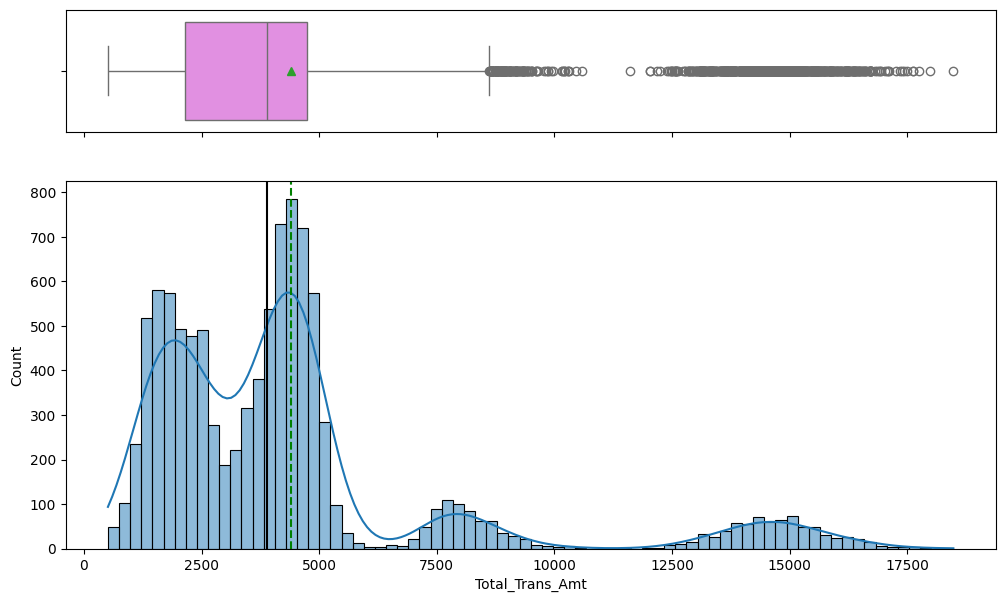

In [ ]:
# Use the correct DataFrame name
histogram_boxplot(Copy_Bank_Churners_df, "Total_Trans_Amt", kde=True)
#histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

### Observation:

**Boxplot:**

*   The boxplot at the top shows the distribution of Total_Trans_Amt, with the green triangle indicating the mean.

*   There are several outliers on the right side (high values of Total_Trans_Amt), indicating a right-skewed distribution.

*   The interquartile range (IQR) is tightly clustered, suggesting that the bulk of transactions are concentrated in a specific range.

**Histogram:**

*   The histogram, along with the KDE plot, shows a bimodal distribution, with two distinct peaks around 2500 and 5000.

*   The majority of transaction amounts are in the range of 0 to 5000, with a significant drop-off after that. The right tail is long due to a few high-value transactions, indicating the presence of outliers.

*   The dotted green line in the histogram marks the mean, which aligns with the second peak, reinforcing the skewness.

In [ ]:
# Summary statistics for Total_Trans_Amt
summary_stats = Copy_Bank_Churners_df['Total_Trans_Amt'].describe()
print("Summary Statistics for Total_Trans_Amt:")
print(summary_stats)

Summary Statistics for Total_Trans_Amt:
count   10127.000
mean     4404.086
std      3397.129
min       510.000
25%      2155.500
50%      3899.000
75%      4741.000
max     18484.000
Name: Total_Trans_Amt, dtype: float64


In [ ]:
# Outlier detection using IQR
Q1 = Copy_Bank_Churners_df['Total_Trans_Amt'].quantile(0.25)
Q3 = Copy_Bank_Churners_df['Total_Trans_Amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = Copy_Bank_Churners_df[(Copy_Bank_Churners_df['Total_Trans_Amt'] < lower_bound) |
                                  (Copy_Bank_Churners_df['Total_Trans_Amt'] > upper_bound)]
print(f"\nNumber of outliers in Total_Trans_Amt: {outliers.shape[0]}")


Number of outliers in Total_Trans_Amt: 896


### Observations

**General Statistics:**

*  **Count:** 10,127 customers.

*  **Mean:** 4,404.09 transactions.

*  **Standard Deviation:** 3,397.13, indicating a wide variability in transaction amounts.

*  **Median (50th percentile):** 3,899 transactions.

*  **Range:** Minimum of 510 and a maximum of 18,484 transactions.

**Interquartile Range (IQR) Method for Outliers:**

*  **Q1 (25th percentile):** 2,155.5 transactions.

*  **Q3 (75th percentile):** 4,741 transactions.

*  **IQR:** 2,585.5 (Q3 - Q1).

**Lower Bound:**

*  -1,623.75 (values below this would be outliers, though none can occur since transaction values can't be negative).

**Upper Bound:**

*  8,520.25 (values above this are considered outliers).

####**Outliers:**

**Number of Outliers:**

*  896 customers have transaction amounts outside the upper bound, indicating high transaction activity.

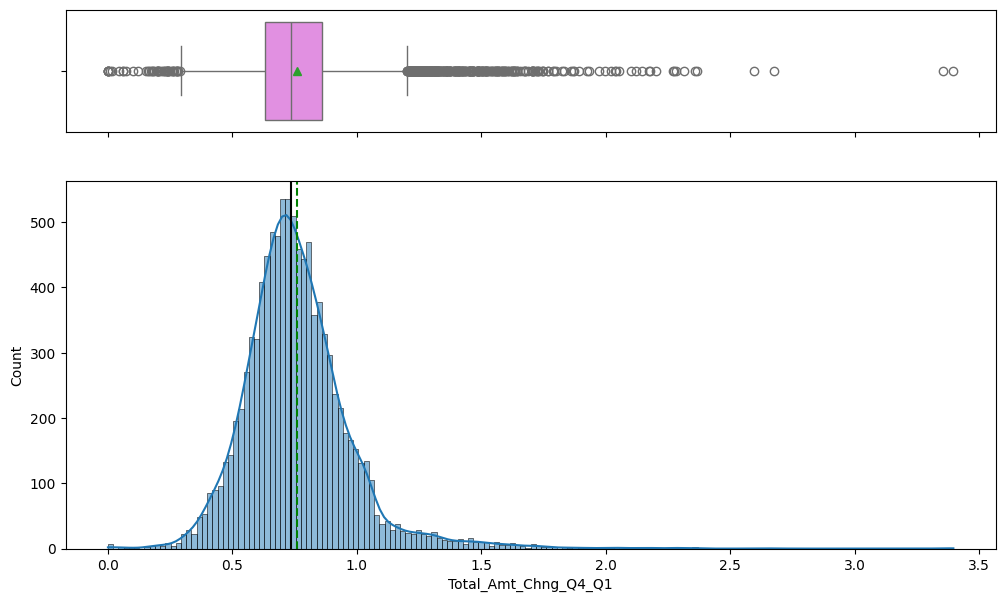

In [ ]:
histogram_boxplot(Copy_Bank_Churners_df, "Total_Amt_Chng_Q4_Q1", kde=True)

### Observation

**Boxplot:**

*   The boxplot shows a symmetric distribution with a green triangle indicating the mean.

*   There are some outliers on both ends, but more prominently on the higher end (right), showing that some customers had a significantly higher change in transaction amount from Q1 to Q4.

*   The interquartile range (IQR) is more spread out than the previous plot, suggesting moderate variability in the data.

**Histogram:**

*   The histogram shows a roughly normal distribution, slightly right-skewed, with the majority of values clustered between 0.5 and 1.0.

*   The green dotted line marking the mean is near 0.75, aligning with the central tendency of the data.

*   There is a long right tail, indicating some customers experienced a large increase in transaction amounts from Q1 to Q4, represented by outliers.

In [ ]:
# Summary statistics for Total_Amt_Chng_Q4_Q1
summary_stats = Copy_Bank_Churners_df['Total_Amt_Chng_Q4_Q1'].describe()
print("Summary Statistics for Total_Amt_Chng_Q4_Q1:")
print(summary_stats)

Summary Statistics for Total_Amt_Chng_Q4_Q1:
count   10127.000
mean        0.760
std         0.219
min         0.000
25%         0.631
50%         0.736
75%         0.859
max         3.397
Name: Total_Amt_Chng_Q4_Q1, dtype: float64


In [ ]:
# Outlier detection using IQR
Q1 = Copy_Bank_Churners_df['Total_Amt_Chng_Q4_Q1'].quantile(0.25)
Q3 = Copy_Bank_Churners_df['Total_Amt_Chng_Q4_Q1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### Observations

**General Statistics:**

*    **Count:**  10,127 customers.

*   **Mean:**  0.760, indicating an average moderate change in transaction amounts between Q4 and Q1.

*   **Standard Deviation:**  0.219, showing a reasonable spread of values.

*   **Median (50th percentile):**  0.736.

*   **Range:**  Minimum of 0.0 and a maximum of 3.397.

**Interquartile Range (IQR) Method for Outliers:**


*   **Q1 (25th percentile):** 0.631.

*   **Q3 (75th percentile):** 0.859.

*   **IQR:** 0.228 (Q3 - Q1).

*   **Lower Bound:** 0.289 (values below this are outliers).

*   **Upper Bound:** 1.201 (values above this are outliers).

**Outliers:**

*   **Number of Outliers:** 396 customers have values outside the IQR bounds, most likely with significantly large or small changes in their transaction amounts.

#2. What is the distribution of the level of education of customers?

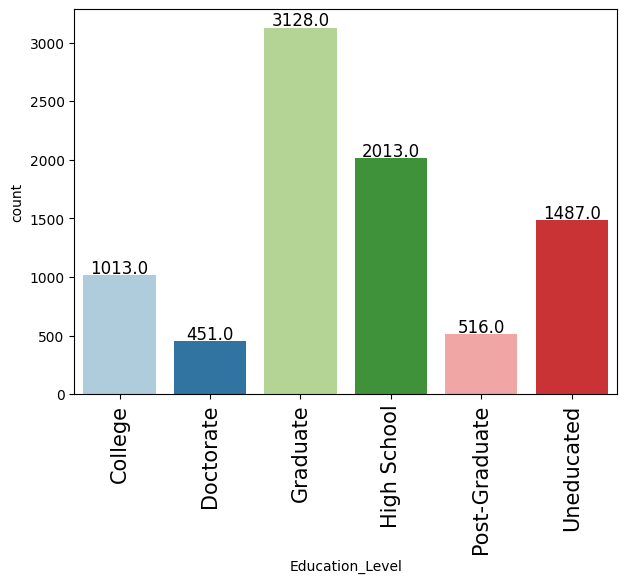

In [ ]:
labeled_barplot(Copy_Bank_Churners_df, 'Education_Level')

### Observation

**Graduate:**

*   This is the most common education level, with 3,128 customers, representing the largest group.

**High School:**

 *   The second-largest group, with 2,013 customers.

**Uneducated:**

 *   There are 1,487 customers in this category, making it the third largest.

**College:**

*   There are 1,013 customers who have completed college education.

**Post-Graduate:**

 *   This category has 516 customers.

**Doctorate:**

 *   This is the smallest group, with only 451 customers.

#3. What is the distribution of the level of income of customers?

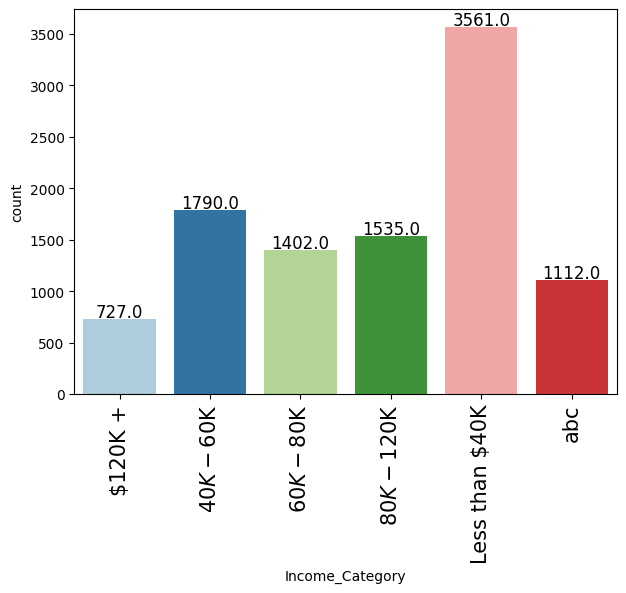

In [ ]:
labeled_barplot(Copy_Bank_Churners_df, 'Income_Category')

### Observations on Income Category Distribution

**Most Common Income Category:**

*    "Less than $40K" is the largest group, with 3,561 customers.

**Moderate Income Groups:**

*   The $40K - $60K and $80K - $120K ranges are relatively well-represented, with 1,790 and 1,535 customers respectively.

**Higher Income Groups:**

*    The $60K - $80K category has 1,402 customers, while the $120K+ group is the smallest, with 727 customers.

**Miscellaneous Category ("abc"):**

 *   A significant number of customers (1,112) fall under the "abc" category, which may represent missing or incorrect data.

**Key Insight:**

 *   Most customers belong to lower income brackets, with "Less than $40K" making up the largest share.

#4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

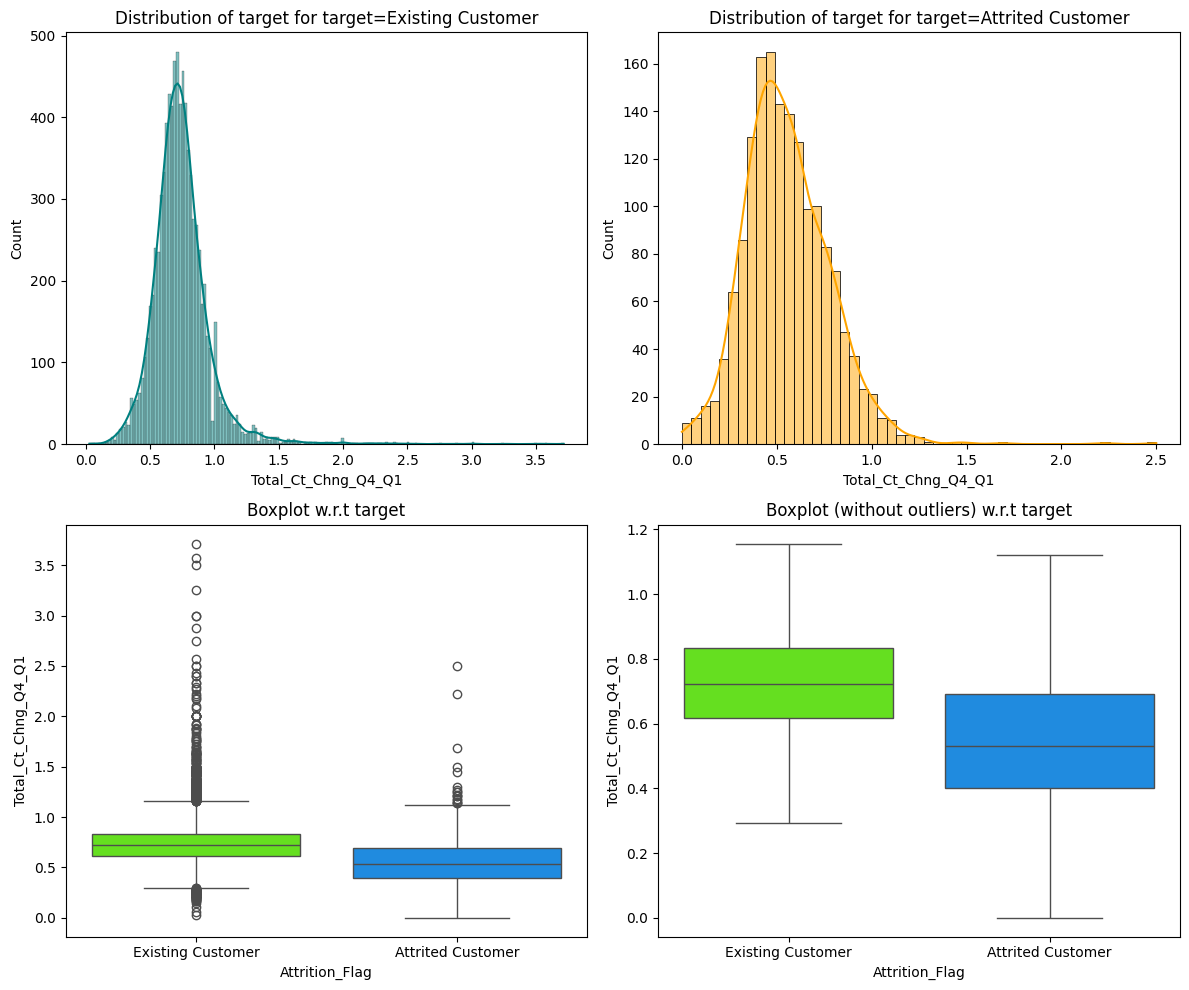

In [ ]:
#stacked_barplot(Copy_Bank_Churners_df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")
distribution_plot_wrt_target(Copy_Bank_Churners_df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

### Observations

**Existing Customers:**

*    The distribution is more concentrated around a higher transaction change value (mean close to 1), indicating more consistent or increasing transactions between Q4 and Q1.

*    Boxplot shows that most existing customers have higher transaction changes, with a larger interquartile range and outliers reaching above 3.5.

**Attrited Customers:**

*    The distribution is shifted lower, peaking around 0.5, suggesting a decrease or lower transaction frequency between Q4 and Q1.

*    Boxplot reveals a smaller range and lower median compared to existing customers, showing that attrited customers generally have lower transaction changes.

**Key Insight:**

*     Existing customers tend to have a higher and more consistent transaction volume, while attrited customers show lower and more variable transaction changes between Q4 and Q1.

#5. How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

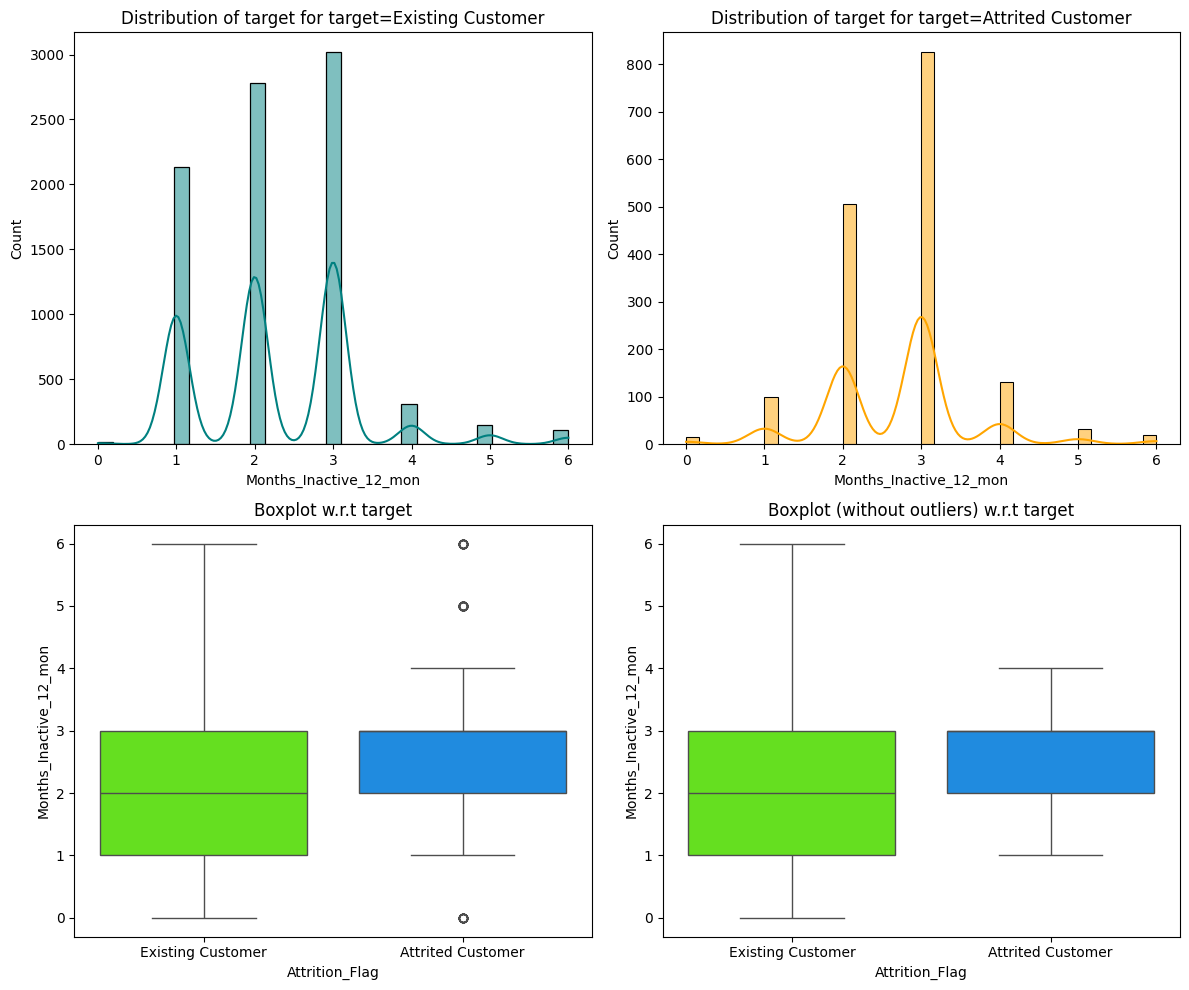

In [ ]:
distribution_plot_wrt_target(Copy_Bank_Churners_df, "Months_Inactive_12_mon", "Attrition_Flag")

### Observations

**Existing Customers:**

*    The distribution shows multiple peaks at inactivity values of 0, 1, 2, and 3 months.

*     The highest concentration is around 1-2 months, indicating most existing customers have been inactive for a short period within the last year.

*    The boxplot indicates a slightly lower median for inactivity compared to attrited customers, suggesting existing customers are generally more active.

**Attrited Customers:**

*    The distribution peaks around 2-3 months of inactivity, showing a higher inactivity level among attrited customers, with some having been inactive for as many as 6 months.

*    The boxplot shows a higher median inactivity for attrited customers, reflecting a trend of prolonged inactivity leading up to account closure.

**Key Insight:**

*    Attrited customers generally show higher inactivity (around 2-3 months), while existing customers tend to be more active, with a lower inactivity period (peaks at 1-2 months).

#Bivariate Analysis

#6. What are the attributes that have a strong correlation with each other?

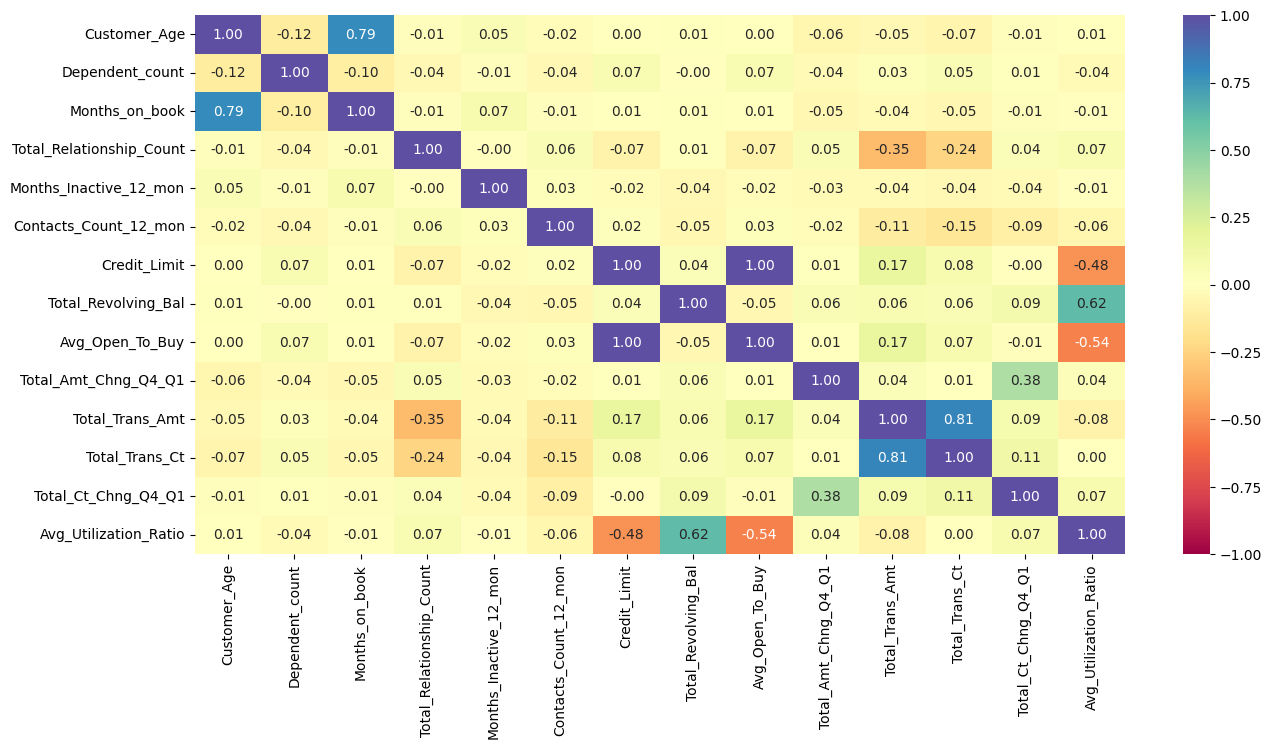

In [ ]:
# Select only the numeric columns for correlation
numeric_columns = Copy_Bank_Churners_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_columns.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

##Oservation

*   Customer Age and Months on Book have a high positive correlation (0.79). This makes sense as older customers likely have been with the bank for a longer time.

*   Total Transaction Amount and Total Transaction Count show a very strong positive correlation (0.81). This suggests that customers who make more transactions also tend to have a higher total transaction amount.

*   Total Revolving Balance and Avg Utilization Ratio are highly correlated (0.62), indicating that customers with higher revolving balances also tend to use more of their available credit.

*   Total Amount Change Q4-Q1 and Total Count Change Q4-Q1 show a moderate positive correlation (0.38), meaning that customers who change their transaction count also see changes in the total transaction amount.

*   Credit Limit and Avg Open to Buy have a negative correlation (-0.54), as a higher credit limit often leads to a larger available balance.

*   Months Inactive 12_mon and Total Relationship Count have a negative correlation (-0.35), suggesting that customers who are inactive tend to have fewer relationships with the bank.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


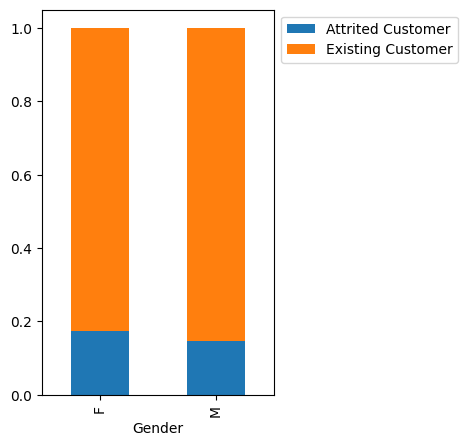

In [ ]:
# create distribution_plot for Gender vs Attrition_Flag
stacked_barplot(Copy_Bank_Churners_df, "Gender", "Attrition_Flag")

### Gender vs Attrition Flag Observations:

**Total Customers:**

*   10,127, with 16.1% attrited (1,627 customers) and 83.9% existing (8,500 customers).

**Female Customers:**

*   5,358 in total.

*   17.4% attrited (930 customers).

*   82.6% existing (4,428 customers).

**Male Customers:**

*   4,769 in total.

*   14.6% attrited (697 customers).

*   85.4% existing (4,072 customers).

**Key Insight:**

*   Female customers show a slightly higher attrition rate (17.4%) compared to male customers (14.6%). However, the majority of both groups remain existing customers.

Marital_Status     Divorced  Married  Single   All
Attrition_Flag                                    
All                     748     4687    3943  9378
Existing Customer       627     3978    3275  7880
Attrited Customer       121      709     668  1498
------------------------------------------------------------------------------------------------------------------------


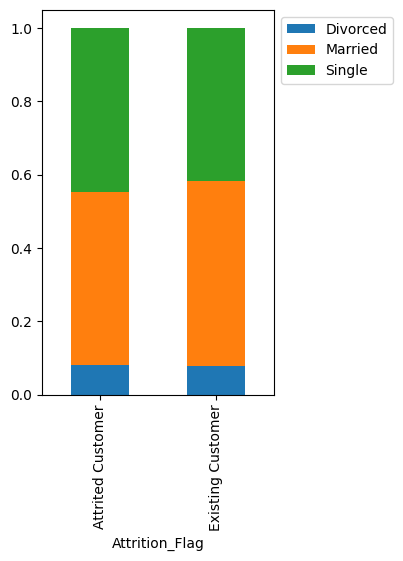

In [ ]:
# create distribution_plot for Attrition_Flag vs Marital_Status
stacked_barplot(Copy_Bank_Churners_df,'Attrition_Flag','Marital_Status')

### Observation

**Attrition Flag vs Marital Status**

**Total Customers:**

*   9,378, with 16.0% attrited (1,498 customers) and 84.0% existing (7,880 customers).

**Divorced Customers:**

*   748 total.

*   16.2% attrited (121 customers).

*   83.8% existing (627 customers).

**Married Customers:**

*   4,687 total.

*   15.1% attrited (709 customers).

*   84.9% existing (3,978 customers).

**Single Customers:**

*   3,943 total.

*   16.9% attrited (668 customers).

*   83.1% existing (3,275 customers).

**Key Insight:**

*    Attrition rates are relatively consistent across marital statuses, with single customers showing a slightly higher attrition rate (16.9%) compared to married (15.1%) and divorced customers (16.2%). However, the majority remain existing customers in all groups.

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
All                   1013        451      3128         2013            516   
Existing Customer      859        356      2641         1707            424   
Attrited Customer      154         95       487          306             92   

Education_Level    Uneducated   All  
Attrition_Flag                       
All                      1487  8608  
Existing Customer        1250  7237  
Attrited Customer         237  1371  
------------------------------------------------------------------------------------------------------------------------


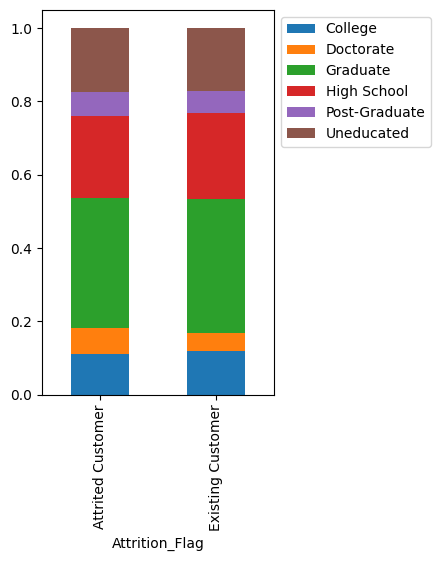

In [ ]:
# create distribution_plot for Attrition_Flag vs Education_Level
stacked_barplot(Copy_Bank_Churners_df,'Attrition_Flag','Education_Level')

### Observation

#### **Attrition Flag vs Education Level**

**Total Customers:**

*    8,608, with 15.9% attrited (1,371 customers) and 84.1% existing (7,237 customers).

**College:**

*    1,013 total.

*    15.2% attrited (154 customers).

*    84.8% existing (859 customers).

**Doctorate:**

*    451 total.

*    21.1% attrited (95 customers).

*    78.9% existing (356 customers).

**Graduate:**

*    3,128 total.

*    15.6% attrited (487 customers).

*    84.4% existing (2,641 customers).

**High School:**

*    2,013 total.

*    15.2% attrited (306 customers).

*    84.8% existing (1,707 customers).

**Post-Graduate:**

*    516 total.

*    17.8% attrited (92 customers).

*    82.2% existing (424 customers).

**Uneducated:**

*    1,487 total.

*    15.9% attrited (237 customers).

*    84.1% existing (1,250 customers).

**Key Insight:**

*    Attrition rates vary slightly across education levels, with the Doctorate group having the highest attrition rate (21.1%), while most education levels show attrition rates between 15-18%.

Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
All                    727         1790         1402          1535   
Existing Customer      601         1519         1213          1293   
Attrited Customer      126          271          189           242   

Income_Category    Less than $40K   abc    All  
Attrition_Flag                                  
All                          3561  1112  10127  
Existing Customer            2949   925   8500  
Attrited Customer             612   187   1627  
------------------------------------------------------------------------------------------------------------------------


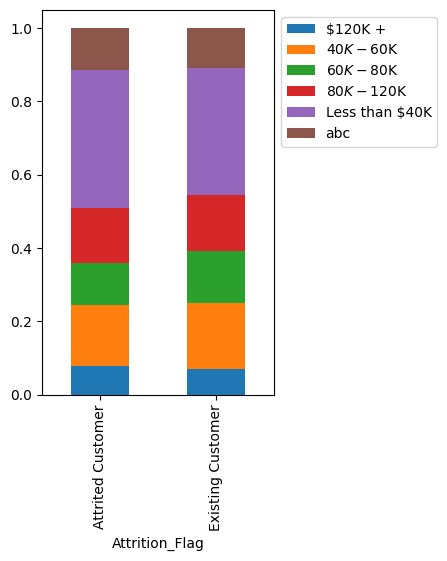

In [ ]:
# create distribution_plot for Attrition_Flag vs Income_Category
stacked_barplot(Copy_Bank_Churners_df,'Attrition_Flag','Income_Category')

### Observation

**Attrition Flag vs Income Category**

**Total Customers:**

*    10,127, with 16.1% attrited (1,627 customers) and 83.9% existing (8,500 customers).

**$120K+ Income:**

*    727 total.

*    17.3% attrited (126 customers).

*    82.7% existing (601 customers).

*    $40k - $60k

**Income:**

*    1,790 total.

*    15.1% attrited (271 customers).

*    84.9% existing (1,519 customers).

*    $60K - $80K

**Income:**

*    1,402 total.

*    13.5% attrited (189 customers).

*    86.5% existing (1,213 customers).

*    $80K - $120K

**Income:**

*    1,535 total.

*    15.8% attrited (242 customers).

*    84.2% existing (1,293 customers).

**Less than $40K Income:**

*    3,561 total.

*    17.2% attrited (612 customers).

*    82.8% existing (2,949 customers).

**'abc' Category:**

*    1,112 total.

*    16.8% attrited (187 customers).

*    83.2% existing (925 customers).

**Key Insight:**

*    The $60K - $80K income group shows the lowest attrition rate (13.5%), while higher and lower-income categories have slightly higher attrition rates around 15-17%.

Contacts_Count_12_mon    0     1     2     3     4    5   6    All
Attrition_Flag                                                    
Attrited Customer        7   108   403   681   315   59  54   1627
All                    399  1499  3227  3380  1392  176  54  10127
Existing Customer      392  1391  2824  2699  1077  117   0   8500
------------------------------------------------------------------------------------------------------------------------


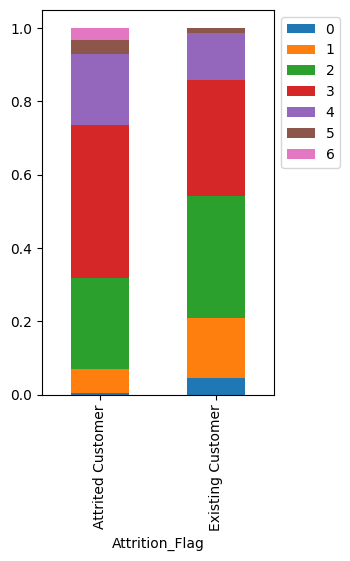

In [ ]:
# create distribution_plot for Attrition_Flag vs Contacts_Count_12_mon
stacked_barplot(Copy_Bank_Churners_df,'Attrition_Flag','Contacts_Count_12_mon')

### Observation

### **Attrition Flag vs Contacts Count (12 Months) - Short Observations:**

**Total Customers:**

*    10,127, with 16.1% attrited (1,627) and 83.9% existing (8,500).

**0 Contacts:**

*    399 total.
*    1.8% attrited (7 customers).
*    98.2% existing (392 customers).

**1 Contact:**

*    1,499 total.
*    7.2% attrited (108 customers).
*    92.8% existing (1,391 customers).

**2 Contacts:**

*    3,227 total.
*    12.5% attrited (403 customers).
*    87.5% existing (2,824 customers).

**3 Contacts:**

*    3,380 total.
*    20.1% attrited (681 customers).
*    79.9% existing (2,699 customers).

**4 Contacts:**

*    1,392 total.
*    22.6% attrited (315 customers).
*    77.4% existing (1,077 customers).

**5 Contacts:**

*    176 total.
*    33.5% attrited (59 customers).
*    66.5% existing (117 customers).

**6 Contacts:**

*    54 total.
*    100% attrited (54 customers).

**Key Insight:**

*    Attrition rates increase significantly with more contacts. Customers with 5 or more contacts show the highest attrition (up to 100% at 6 contacts), while those with 0-1 contacts show very low attrition rates.

Card_Category      Blue  Gold  Platinum  Silver    All
Attrition_Flag                                        
All                9436   116        20     555  10127
Existing Customer  7917    95        15     473   8500
Attrited Customer  1519    21         5      82   1627
------------------------------------------------------------------------------------------------------------------------


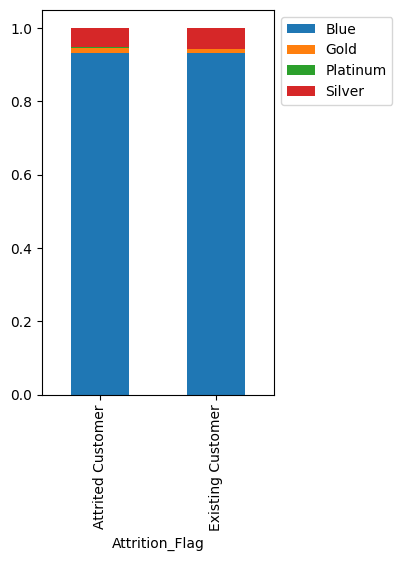

In [ ]:
# create distribution_plot for Attrition_Flag vs Card_Category
stacked_barplot(Copy_Bank_Churners_df,'Attrition_Flag','Card_Category')

### Observation

#### **Attrition Flag vs Card Category**

**Total Customers:**

*    10,127, with 16.1% attrited (1,627) and 83.9% existing (8,500).

**Blue Card:**

*    93.2% of total customers (9,436).

*    16.1% attrited (1,519).

*    83.9% existing (7,917).

**Gold Card:**

*    1.1% of total customers (116).

*    18.1% attrited (21).

*    81.9% existing (95).

**Platinum Card:**

*    0.2% of total customers (20).

*    25% attrited (5).

*    75% existing (15).

**Silver Card:**

*    5.5% of total customers (555).

*    14.8% attrited (82).

*    85.2% existing (473).

**Key Insight:**

*    The Blue card category dominates, with a similar attrition rate (16.1%) to the overall average. Platinum card holders have the highest attrition rate (25%), although the sample size is small.

In [ ]:
Copy_Bank_Churners_df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Data Pre-processing

In [ ]:
# Select only the numerical columns
numerical_cols = Copy_Bank_Churners_df.select_dtypes(include=['float64', 'int64'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the numerical columns
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
# Output the lower and upper bounds
print("Lower Bound:\n", lower)

Lower Bound:
 Customer_Age                   24.500
Dependent_count                -2.000
Months_on_book                 17.500
Total_Relationship_Count        0.000
Months_Inactive_12_mon          0.500
Contacts_Count_12_mon           0.500
Credit_Limit               -10213.750
Total_Revolving_Bal         -1778.500
Avg_Open_To_Buy            -11477.250
Total_Amt_Chng_Q4_Q1            0.289
Total_Trans_Amt             -1722.750
Total_Trans_Ct                 -9.000
Total_Ct_Chng_Q4_Q1             0.228
Avg_Utilization_Ratio          -0.697
dtype: float64


In [ ]:
print("Upper Bound:\n", upper)

Upper Bound:
 Customer_Age                  68.500
Dependent_count                6.000
Months_on_book                53.500
Total_Relationship_Count       8.000
Months_Inactive_12_mon         4.500
Contacts_Count_12_mon          4.500
Credit_Limit               23836.250
Total_Revolving_Bal         3921.500
Avg_Open_To_Buy            22660.750
Total_Amt_Chng_Q4_Q1           1.201
Total_Trans_Amt             8619.250
Total_Trans_Ct               135.000
Total_Ct_Chng_Q4_Q1            1.172
Avg_Utilization_Ratio          1.223
dtype: float64


In [ ]:
# Checking the percentage of outliers
outliers = (Copy_Bank_Churners_df.select_dtypes(include=["float64", "int64"]) < lower) | (Copy_Bank_Churners_df.select_dtypes(include=["float64", "int64"]) > upper)

In [ ]:
# Calculate the percentage of outliers for each numerical column
outlier_percentage = outliers.sum() / len(Copy_Bank_Churners_df) * 100

In [ ]:
# Output the percentage of outliers
print("Percentage of Outliers:\n", outlier_percentage)

Percentage of Outliers:
 Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64


In [ ]:
def subplot(data, feature, i):
  plt.figure(figsize=(15, 12))
  plt.subplot(4, 4, i + 1)
  plt.boxplot(data[feature], whis=1.5)
  plt.tight_layout()
  plt.title(feature)

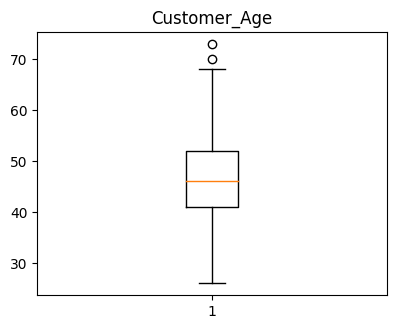

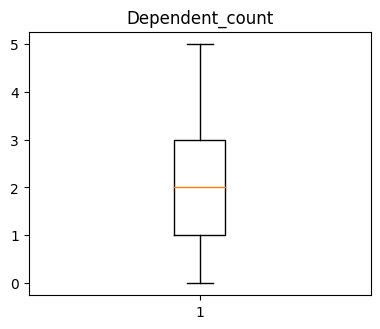

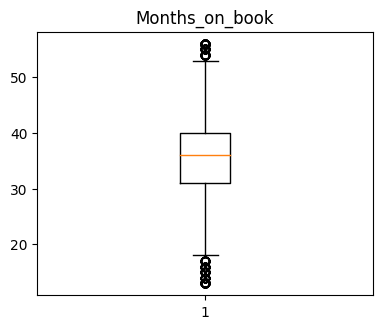

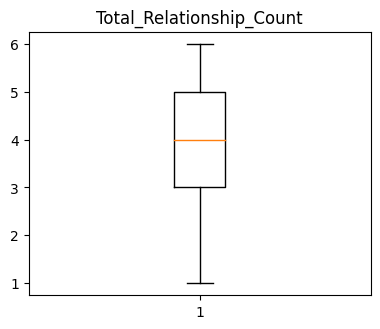

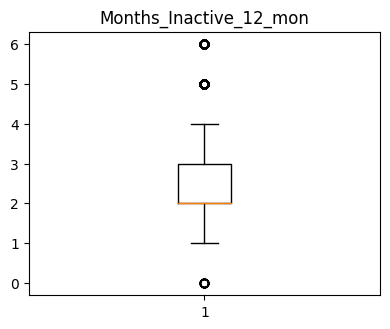

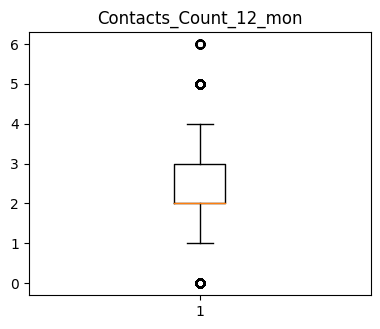

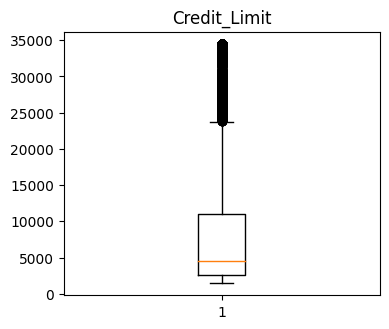

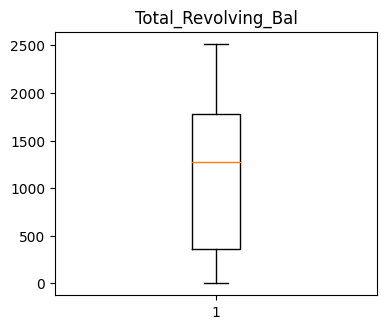

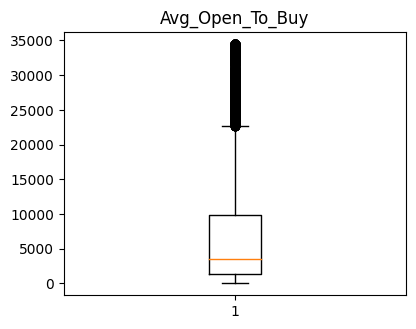

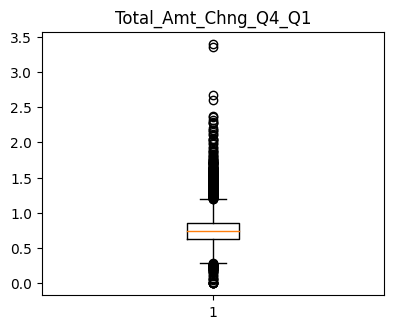

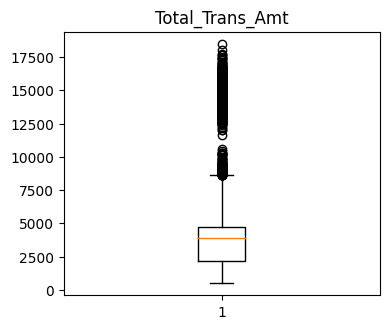

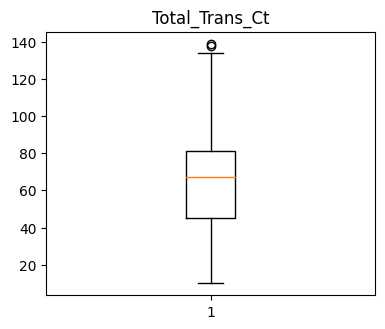

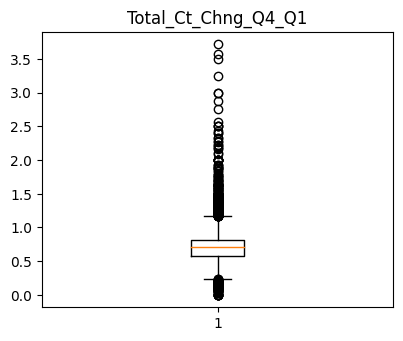

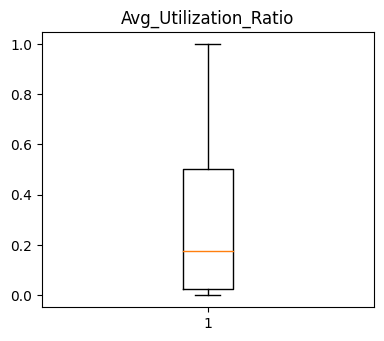

In [ ]:
for i, column in enumerate(numerical_cols):
  subplot(Copy_Bank_Churners_df, column, i)

### Observation

**Customer Age:**

*   The age range of customers varies between 30 to 70, with a few outliers slightly below 30. Most customers are in the 40 to 60 age range.

**Dependent Count:**

*   The dependent count ranges from 0 to 5 with no significant outliers.

**Months on Book:**

 *   There are a few outliers, particularly with low values (below 10 months) and higher values above 50 months, suggesting some unusual records for customers with very short or very long tenures.

**Total Relationship Count:**

 *   Most customers have between 3 to 6 relationships, with no visible outliers.

*   Months Inactive in 12 months: A few customers have 0 or more than 4 inactive months, which could indicate unusual inactivity behavior.

**Contacts Count in 12 months:**

*   There are outliers, especially for customers with more than 4 contacts in a year, indicating potentially high interaction.

**Credit Limit:**

*    This attribute has many outliers, particularly with credit limits above 20,000, suggesting that a subset of customers has significantly higher credit limits.

**Total_Revolving_Bal:**

*    The data distribution shows a fairly compact range with no extreme outliers.

**Avg_Open_To_Buy:**

*   There are significant outliers in this feature, extending far beyond the upper quartile. This suggests some customers have a much higher open-to-buy amount compared to the majority.

**Total_Amt_Chng_Q4_Q1:**

*    There are a few noticeable outliers in both directions, but the majority of data lies within a smaller range. A small number of customers have extreme changes in their total amount.

**Total_Trans_Amt:**

*    This variable contains many high-value outliers, indicating that some customers have made significantly larger transaction amounts compared to others.

**Total_Trans_Ct:**

*    Most values are concentrated between the 20-100 range, with a few outliers slightly beyond the upper bound.

**Total_Ct_Chng_Q4_Q1:**

*   Similar to the total amount change, there are multiple outliers, but the bulk of data lies within a concentrated range.

**Avg_Utilization_Ratio:**

*    This distribution is more balanced, with no noticeable outliers. The ratio is between 0 and 1, with the average utilization ratio leaning towards the lower end.

#Train-Test Split

In [ ]:
#Copy_Bank_Churners_df["Income_Category"].replace("Unknown", np.nan, inplace=True)
Copy_Bank_Churners_df["Income_Category"].replace('abc', np.nan, inplace=True)

In [ ]:
Copy_Bank_Churners_df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', nan], dtype=object)

In [ ]:
Copy_Bank_Churners_df.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
# Dividing train data into X and y

X = Copy_Bank_Churners_df.drop(["Attrition_Flag"], axis=1)
y = Copy_Bank_Churners_df["Attrition_Flag"]

In [ ]:
#Splitting data into training and temporary set (80:20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Splitting temporary data into validation and test set (75:25)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 of 0.2 = 0.05

In [ ]:
#Print the shapes of the datasets
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


### Observations:

##**Data Splitting:**

**The dataset has been split into three sets:**

*   Training set: 80% of the data (8101 rows, 19 columns).

*   Validation set: 5% of the data (507 rows, 19 columns).

*   Test set: 15% of the data (1519 rows, 19 columns).

*   This ensures that the model can be trained, validated, and tested on distinct subsets of the data, helping to avoid overfitting and ensuring the model generalizes well.

###**Missing Values:**

**The dataset has some missing values in specific columns:**

*   Education_Level: 1519 missing values.

*   Marital_Status: 749 missing values.

*   Income_Category: 1112 missing values.

*   Addressing these missing values (e.g., using imputation strategies or dropping them) will be essential for improving the performance of the machine learning model.

###**Handling 'Income_Category':**

*   The 'Income_Category' column had a placeholder value "abc", which was replaced with NaN to handle incorrect data. This is reflected in the missing value count for this column.

*   The unique values after the replacement include income ranges and NaN, confirming that erroneous values were successfully replaced.

###**Target Variable ('Attrition_Flag'):**

*   The target variable for the classification task is 'Attrition_Flag', which will predict whether a customer will churn.

###**Shape Consistency:**

*   All datasets (training, validation, and test) have 19 features, ensuring consistency across the splits. This is important for model training and evaluation.

**Data Preparation Workflow:**

*   he process of replacing invalid values, handling missing data, and performing a train/validation/test split is a standard and crucial part of the machine learning pipeline.

*   This step sets the foundation for building and validating the predictive model for customer churn.

## Missing value imputation




In [ ]:
#  Define the columns that need imputation
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# Create an imputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())  # Count of missing values in the training set
print("-" * 30)  # Separator line
print(X_val.isna().sum())     # Count of missing values in the validation set
print("-" * 30)  # Separator line
print(X_test.isna().sum())    # Count of missing values in the test set

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4279
M    3822
Name: count, dtype: int64
******************************
Education_Level
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: count, dtype: int64
******************************
Marital_Status
Married     4346
Single      3144
Divorced     611
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    266
M    241
Name: count, dtype: int64
******************************
Education_Level
Graduate         237
High School       94
Uneducated        84
College           49
Doctorate         24
Post-Graduate     19
Name: count, dtype: int64
******************************
Marital_Status
Married     272
Single      193
Divorced     42
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    236
$40K - $60K        88
$60K - $80K        74
$80K - $120K       71
$120K +            38
Name: count, dtype: int64
******************************
Card_Category
Blue        465
Silver       37
Gold          3
Platinum      2
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4279
M    3822
Name: count, dtype: int64
******************************
Education_Level
Graduate         3733
High School      1619
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: count, dtype: int64
******************************
Marital_Status
Married     4346
Single      3144
Divorced     611
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3701
$40K - $60K       1453
$80K - $120K      1237
$60K - $80K       1122
$120K +            588
Name: count, dtype: int64
******************************
Card_Category
Blue        7557
Silver       436
Gold          93
Platinum      15
Name: count, dtype: int64
******************************



###Observations:

**Imputation of Missing Values:**

*    After applying the imputation strategy (most_frequent), missing values in the Education_Level, Marital_Status, and Income_Category columns have been successfully handled across the training, validation, and test datasets.

*    The isna().sum() results confirm that there are no missing values remaining in the imputed columns in all datasets (training, validation, test).

**Data Distribution:**

*    The categorical columns (Gender, Education_Level, Marital_Status, Income_Category, Card_Category) show the distribution of values:

**Gender:**

*    In the training set, the count of females (F) is slightly higher (4279) than males (M) (3822).

**Education_Level:**

*    The most frequent education level is Graduate (3733 instances), followed by High School and Uneducated.

*    Higher education levels like Doctorate and Post-Graduate have much lower counts compared to other categories.

**Marital_Status:**

*    Most customers are Married (4346), followed by Single (3144), with a smaller number categorized as Divorced (611).

**Income_Category:**

*    The majority of customers fall into the Less than $40K income range (3701), with smaller numbers in the higher income ranges.

*    Only 588 customers fall in the $120K+ income bracket, indicating a skewed income distribution towards the lower income ranges.

**Card_Category:**

*    The vast majority of customers have Blue cards (7557), while a much smaller fraction have Silver, Gold, and Platinum cards, indicating that Blue is the dominant category.

*    Platinum cards are the rarest, with only 15 instances.

**Consistency Across Sets:**

*    The categorical distributions for Gender, Education_Level, Marital_Status, Income_Category, and Card_Category are consistent between the training and validation sets, indicating a balanced splitting of the data.

*    The test data has similar distributions, confirming that the splits have maintained a consistent representation of the categorical data across all sets.

**Potential Insights for Model:**

*    Income_Category and Card_Category are highly skewed, which may need to be addressed during model building (e.g., via resampling or class weighting) to avoid bias towards the majority categories.

*    Education_Level also shows a significant concentration in the Graduate and High School levels, while higher education categories are underrepresented.

#Encoding categorical variables

In [ ]:
# One-hot encoding the training set
X_train = pd.get_dummies(X_train, drop_first=True)

# One-hot encoding the validation set
X_val = pd.get_dummies(X_val, drop_first=True)

# One-hot encoding the test set
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
# Print the shapes of the datasets to check
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (507, 29) (1519, 29)


In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,54,1,36,1,3,3,3723.000,1728,1995.000,0.595,8554,99,0.678,0.464,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
5814,58,4,48,1,4,3,5396.000,1803,3593.000,0.493,2107,39,0.393,0.334,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
792,45,4,36,6,1,3,15987.000,1648,14339.000,0.732,1436,36,1.250,0.103,False,False,True,False,False,False,False,True,False,False,False,True,True,False,False
1791,34,2,36,4,3,4,3625.000,2517,1108.000,1.158,2616,46,1.300,0.694,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
5011,49,2,39,5,3,4,2720.000,1926,794.000,0.602,3806,61,0.794,0.708,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False


### Observations:

**1. Dataset Shapes:**

*  Training set: (8101, 29) — 8101 rows and 29 columns.

*  Validation set: (507, 29) — 507 rows and 29 columns.

*  Test set: (1519, 29) — 1519 rows and 29 columns.

*  This confirms that after one-hot encoding, all datasets have consistent numbers of features (29).

**2. Feature Analysis:**

*  The first few rows of the training set show numerical and binary features for different categories that were previously encoded.

*  Columns like Gender_M, Education_Level_Graduate, and Marital_Status_Single represent the one-hot encoded binary variables.

**3. Gender Feature:**

*  Gender_M: This column indicates whether the individual is male (1) or not (0).

*  After encoding, the dataset no longer has a Gender_F column due to drop_first=True, so only Gender_M remains, with female represented implicitly as 0.

**4. Education Level:**

*  Education levels like Graduate, High School, Uneducated, Post-Graduate, Doctorate were one-hot encoded into binary columns such as Education_Level_Graduate.

*  The original 'Education_Level' column is replaced by multiple columns representing each education category.

**5. Marital Status:**

*  Marital_Status_Married and Marital_Status_Single: After encoding, these columns represent whether the individual is married or single, with the reference category being "Divorced" (which is not explicitly represented due to drop_first=True).

**6. Income Category:**

*  Different income categories such as $40K - $60K, $60K - $80K, $80K - $120K, Less than $40K, and $120K+ are also converted into binary columns like Income_Category_$40K - $60K.

*  No explicit column exists for the category that was dropped during encoding (e.g., drop_first=True would drop one category, such as $120K+).

**7. Card Category:**

*  Card_Category was split into categories like Blue, Silver, Gold, and Platinum, and after encoding, columns like Card_Category_Silver, Card_Category_Gold, and Card_Category_Platinum remain.

*  Blue was dropped during encoding and serves as the reference category.

**8. Numerical Features:**

*  Features such as Customer_Age, Dependent_count, Months_on_book, and Total_Trans_Amt are continuous numerical variables that were not transformed during the one-hot encoding process.

*  These variables seem to be well-distributed, with no missing values across all rows as indicated earlier.

**9. Consistency Across Datasets:**

*  After encoding, the number of columns is consistent across all sets (train, validation, and test), which ensures compatibility for model training and evaluation.

*  One-hot encoding was successfully applied with drop_first=True to avoid multicollinearity by dropping the first category in each categorical variable.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Encoding target labels to ensure consistent types
    le = LabelEncoder()
    target_encoded = le.fit_transform(target)  # Encodes strings to 0, 1, etc.

    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Check if predictions are in string format, encode them if necessary
    if isinstance(pred[0], str):  # If the first prediction is a string
        pred = le.transform(pred)  # Transform predictions to match encoded labels

    # Computing performance metrics
    acc = accuracy_score(target_encoded, pred)  # Compute Accuracy
    recall = recall_score(target_encoded, pred, pos_label=1)  # Specify positive label
    precision = precision_score(target_encoded, pred, pos_label=1)  # Specify positive label
    f1 = f1_score(target_encoded, pred, pos_label=1)  # Specify positive label

    # Creating a DataFrame of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0]
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
  """
  To plot the confusion_matrix with percentages

  model: classifier
  predictors: independent variables
  target: dependent variable
  """
  # Encoding the target labels to integers
  le = LabelEncoder()
  target_encoded = le.fit_transform(target)  # Encodes strings to integers (0, 1, etc.)

  # Predicting using the independent variables
  y_pred = model.predict(predictors)

  # If y_pred is in string format, encode it too
  if isinstance(y_pred[0], str):  # Check if the first prediction is a string
      y_pred = le.transform(y_pred)  # Transform predictions to match encoded labels

  # Computing the confusion matrix
  cm = confusion_matrix(target_encoded, y_pred)

  # Generating the label for each cell in the confusion matrix (absolute and percentage)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.sum())]
          for item in cm.flatten()
      ]
  ).reshape(2, 2)

  # Plotting the confusion matrix
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title("Confusion Matrix with Percentages")
  plt.show()

### Model Building with original data

Sample code for model building with original data

In [ ]:
# Convert the labels to numerical values
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # Encode y_train
y_val_enc = le.transform(y_val)  # Encode y_val

In [ ]:
# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1))
]

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train_enc)  # Use the encoded labels for training
    scores = recall_score(y_train_enc, model.predict(X_train), pos_label=le.transform(['Attrited Customer'])[0])  # Use encoded labels
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9938461538461538
Random Forest: 1.0
AdaBoost: 0.8707692307692307
Gradient Boosting: 0.8938461538461538
Decision Tree: 1.0
XGBoost: 1.0


In [ ]:
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train_enc)
    scores_val = recall_score(y_val_enc, model.predict(X_val), pos_label=le.transform(['Attrited Customer'])[0])  # Use encoded labels
    print("{}: {}".format(name, scores_val))


Validation Performance:

Bagging: 0.8918918918918919
Random Forest: 0.7837837837837838
AdaBoost: 0.8513513513513513
Gradient Boosting: 0.8513513513513513
Decision Tree: 0.8108108108108109
XGBoost: 0.9324324324324325


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

Before Oversampling, counts of label 'Yes': 0
Before Oversampling, counts of label 'No': 0 



In [ ]:
# Apply SMOTE to handle class imbalance
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train_enc)  # Use the encoded labels for resampling

# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1))
]

# Positive label (Attrited Customer)
pos_label = le.transform(['Attrited Customer'])[0]

# Training performance on oversampled data
print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)  # Train on the oversampled data
    scores = recall_score(y_train_over, model.predict(X_train_over), pos_label=pos_label)
    print("{}: {}".format(name, scores))

# Validation performance on original validation set
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val_enc, model.predict(X_val), pos_label=pos_label)
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9991177767975298
Random Forest: 1.0
AdaBoost: 0.9691221879135421
Gradient Boosting: 0.9779444199382443
Decision Tree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.918918918918919
Random Forest: 0.8648648648648649
AdaBoost: 0.8243243243243243
Gradient Boosting: 0.918918918918919
Decision Tree: 0.8918918918918919
XGBoost: 0.8918918918918919


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Random undersampler for undersampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train_enc)  # Using the encoded y_train

# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1))
]

# Positive label (Attrited Customer)
pos_label = le.transform(['Attrited Customer'])[0]

# Training performance on undersampled data
print("\nTraining Performance (Undersampled):\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)  # Train on the undersampled data
    scores = recall_score(y_train_un, model.predict(X_train_un), pos_label=pos_label)
    print("{}: {}".format(name, scores))

# Validation performance on original validation set
print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val_enc, model.predict(X_val), pos_label=pos_label)
    print("{}: {}".format(name, scores_val))


Training Performance (Undersampled):

Bagging: 0.9984615384615385
Random Forest: 1.0
AdaBoost: 0.9538461538461539
Gradient Boosting: 0.9792307692307692
Decision Tree: 1.0
XGBoost: 1.0

Validation Performance:

Bagging: 0.9459459459459459
Random Forest: 0.9459459459459459
AdaBoost: 0.9324324324324325
Gradient Boosting: 0.9594594594594594
Decision Tree: 0.9324324324324325
XGBoost: 0.972972972972973


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#For Gradient Boosting

###For Gradient Boosting Original Data

In [ ]:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50, 110, 25),    # Try 50, 75, 100 estimators
    "learning_rate": [0.01, 0.1, 0.05],       # Learning rates to tune
    "subsample": [0.7, 0.9],                  # Subsample ratios for stochastic gradient boosting
    "max_features": [0.5, 0.7, 1],            # Maximum features used at each split
}
gb_model = GradientBoostingClassifier(random_state=1)
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring="recall",   # Optimize for recall (useful for imbalanced classes)
    cv=3,               # 3-fold cross-validation
    verbose=2,          # Verbose output to track progress
    n_jobs=-1           # Use all available CPU cores for parallel processing
)

In [ ]:
grid_search.fit(X_train, y_train_enc)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'init': [AdaBoostClassifier(random_state=1),
                                  DecisionTreeClassifier(random_state=1)],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_features': [0.5, 0.7, 1],
                         'n_estimators': array([ 50,  75, 100]),
                         'subsample': [0.7, 0.9]},
             scoring='recall', verbose=2)

In [ ]:
gbc_tuned = grid_search.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train_enc)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.7)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.01, 'max_features': 1, 'n_estimators': 50, 'subsample': 0.7}


In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train, y_train_enc)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.847   1.000      0.846 0.917
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.840   1.000      0.839 0.912


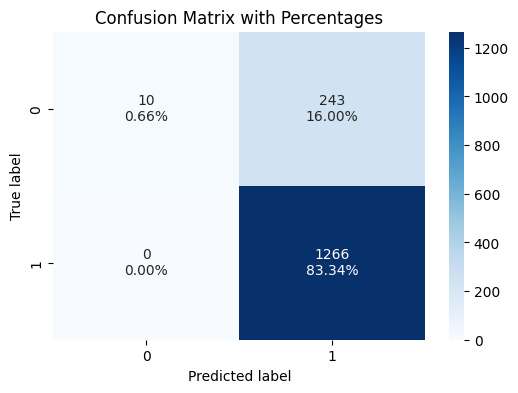

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

####Performance on original data validation set

In [ ]:
gbc_tuned_model_val_perf=model_performance_classification_sklearn(gbc_tuned,X_val,y_val)
print("Testing performance:\n",gbc_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.858   1.000      0.857 0.923


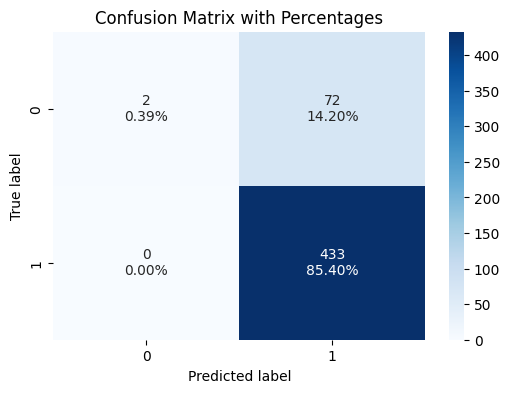

In [ ]:
confusion_matrix_sklearn(gbc_tuned,X_val,y_val)

####For Gradient Boosting using oversampled data

In [ ]:
grid_search.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'init': [AdaBoostClassifier(random_state=1),
                                  DecisionTreeClassifier(random_state=1)],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_features': [0.5, 0.7, 1],
                         'n_estimators': array([ 50,  75, 100]),
                         'subsample': [0.7, 0.9]},
             scoring='recall', verbose=2)

In [ ]:
gbc_tuned_over = grid_search.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
gbc_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.7)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'init': AdaBoostClassifier(random_state=1), 'learning_rate': 0.1, 'max_features': 0.7, 'n_estimators': 100, 'subsample': 0.7}


In [ ]:
#Calculating different metrics
gbc_tuned_over_model_train_perf=model_performance_classification_sklearn(gbc_tuned_over,X_train_over, y_train_over)
print("Training performance:\n",gbc_tuned_over_model_train_perf)
gbc_tuned_over_model_test_perf=model_performance_classification_sklearn(gbc_tuned_over,X_test,y_test)
print("Testing performance:\n",gbc_tuned_over_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.974      0.978 0.976
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.968      0.982 0.975


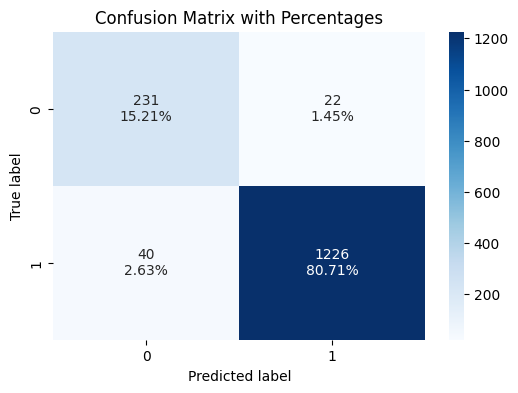

In [ ]:
confusion_matrix_sklearn(gbc_tuned_over,X_test,y_test)

####Performance on original oversample data validation set

In [ ]:
gbc_tuned_over_model_val_perf=model_performance_classification_sklearn(gbc_tuned_over,X_val,y_val)
print("Testing performance:\n",gbc_tuned_over_model_val_perf)


Testing performance:
    Accuracy  Recall  Precision    F1
0     0.953   0.961      0.983 0.972


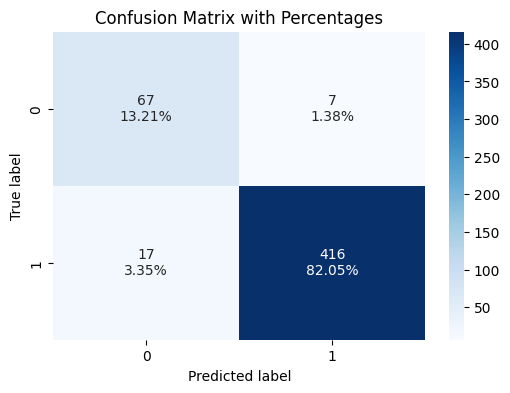

In [ ]:
confusion_matrix_sklearn(gbc_tuned_over,X_val,y_val)

#### For Gradient Boosting using undersampled data

In [ ]:
grid_search.fit(X_train_un, y_train_un)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'init': [AdaBoostClassifier(random_state=1),
                                  DecisionTreeClassifier(random_state=1)],
                         'learning_rate': [0.01, 0.1, 0.05],
                         'max_features': [0.5, 0.7, 1],
                         'n_estimators': array([ 50,  75, 100]),
                         'subsample': [0.7, 0.9]},
             scoring='recall', verbose=2)

In [ ]:
gbc_tuned_un = grid_search.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
gbc_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
#Calculating different metrics
gbc_un_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned_un,X_train_un, y_train_un)
print("Training performance:\n",gbc_un_tuned_model_train_perf)
gbc_under_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned_un,X_test,y_test)
print("Testing performance:\n",gbc_un_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.973      0.979 0.976
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.973      0.979 0.976


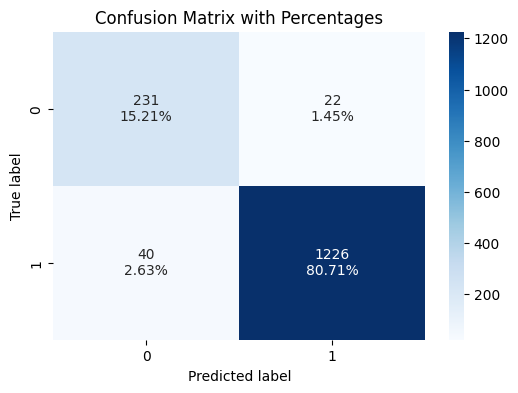

In [ ]:
confusion_matrix_sklearn(gbc_tuned_over,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
gbc_tuned_model_un_val_perf=model_performance_classification_sklearn(gbc_tuned_un,X_val,y_val)
print("Testing performance:\n",gbc_tuned_model_un_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.945   0.942      0.993 0.967


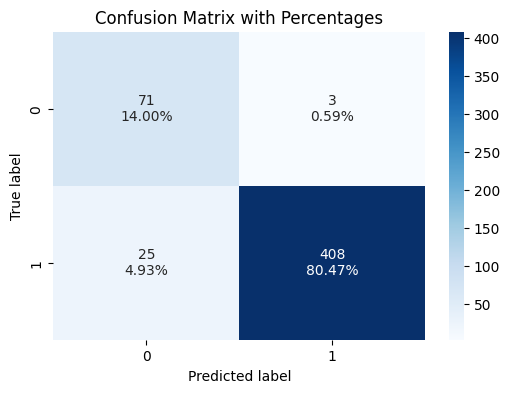

In [ ]:
confusion_matrix_sklearn(gbc_tuned_un,X_val,y_val)

#### For Adaboost with original data

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Define the parameter grid.
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01, 0.1, 0.05],
    "estimator": [  # 'estimator' is correct for newer versions of scikit-learn
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations.
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search.
grid_obj = GridSearchCV(abc_tuned, param_grid, scoring=scorer, cv=5)

In [ ]:
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
abc_tuned_original = grid_obj.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
abc_tuned_original.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, random_state=1)

In [ ]:
#Calculating different metrics
abc_tuned_original_model_train_perf=model_performance_classification_sklearn(abc_tuned_original,X_train,y_train)
print("Training performance:\n",abc_tuned_original_model_train_perf)
abc_tuned_original_model_test_perf=model_performance_classification_sklearn(abc_tuned_original,X_test,y_test)
print("Testing performance:\n",abc_tuned_original_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.894   0.964      0.915 0.938
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.883   0.969      0.899 0.933


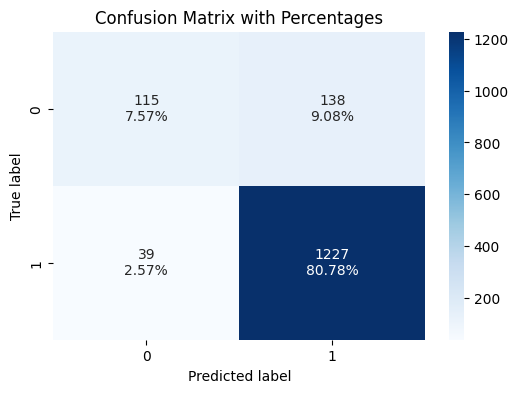

In [ ]:
confusion_matrix_sklearn(abc_tuned_original,X_test,y_test)

####Performance on original data validation set

In [ ]:
abc_tuned_original_model_val_perf=model_performance_classification_sklearn(abc_tuned_original,X_val,y_val)
print("Testing performance:\n",abc_tuned_original_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.915   0.979      0.926 0.952


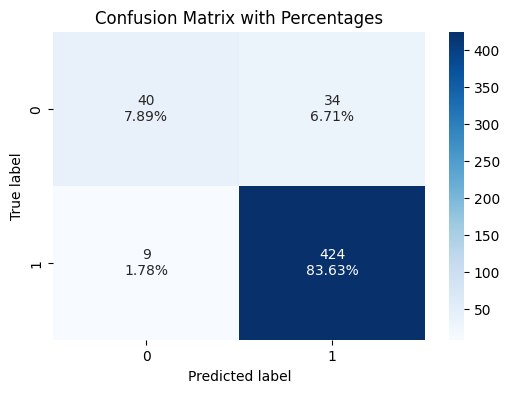

In [ ]:
confusion_matrix_sklearn(abc_tuned_original,X_val,y_val)

#### For Adaboost using oversampled data

In [ ]:
grid_obj = grid_obj.fit(X_train_over, y_train_over)

In [ ]:
# Set the clf to the best combination of parameters
abc_tuned_over = grid_obj.best_estimator_

In [ ]:
abc_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
#Calculating different metrics
abc_tuned_over_model_train_perf=model_performance_classification_sklearn(abc_tuned_over,X_train,y_train)
print("Training performance:\n",abc_tuned_over_model_train_perf)
abc_tuned_over_model_test_perf=model_performance_classification_sklearn(abc_tuned_over,X_test,y_test)
print("Testing performance:\n",abc_tuned_over_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.982   0.989      0.989 0.989
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.962   0.978      0.977 0.977


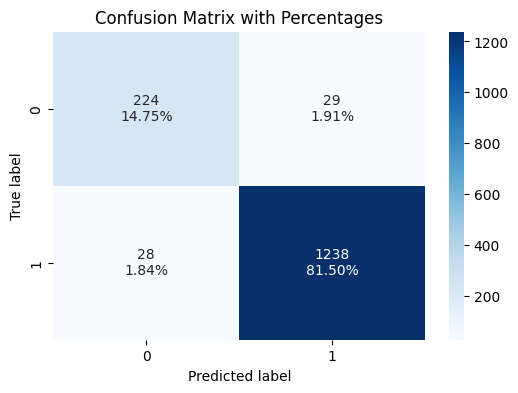

In [ ]:
confusion_matrix_sklearn(abc_tuned_over,X_test,y_test)

####Performance on oversample data validation set

In [ ]:
abc_tuned_over_model_val_perf=model_performance_classification_sklearn(abc_tuned_over,X_val,y_val)
print("Testing performance:\n",abc_tuned_over_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.968      0.984 0.976


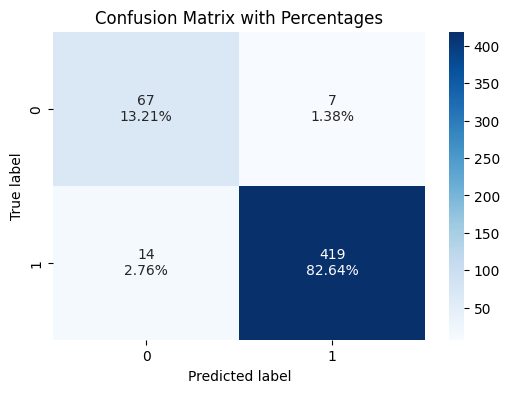

In [ ]:
confusion_matrix_sklearn(abc_tuned_over,X_val,y_val)

####For Adaboost Boosting using undersampled data

In [ ]:
grid_obj = grid_obj.fit(X_train_un, y_train_un)

In [ ]:
abc_tuned_un = grid_search.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
abc_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Calculating different metrics for the training set
abc_un_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned_un, X_train_un, y_train_un)
print("Training performance:\n", abc_un_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.976   0.973      0.979 0.976


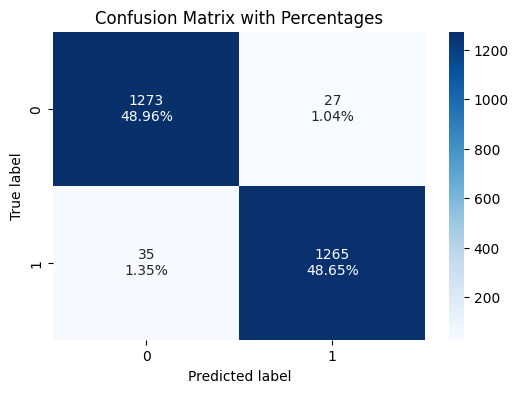

In [ ]:
confusion_matrix_sklearn(abc_tuned_un,X_train_un,y_train_un)

In [ ]:
# Calculating different metrics for the training set
abc_un_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned_un, X_test, y_test)
print("Training performance:\n", abc_un_tuned_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.950   0.949      0.991 0.969


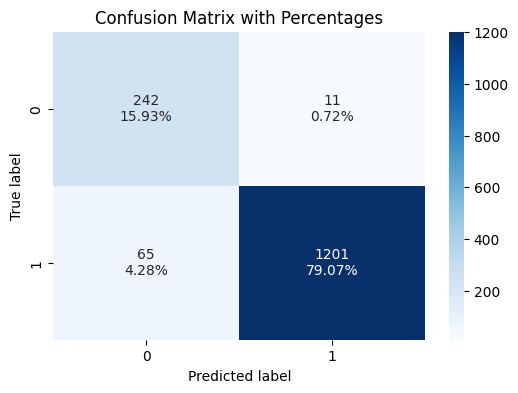

In [ ]:
confusion_matrix_sklearn(abc_tuned_un,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
abc_un_tuned_model_val_perf=model_performance_classification_sklearn(abc_tuned_un,X_val,y_val)
print("Testing performance:\n",abc_un_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.945   0.942      0.993 0.967


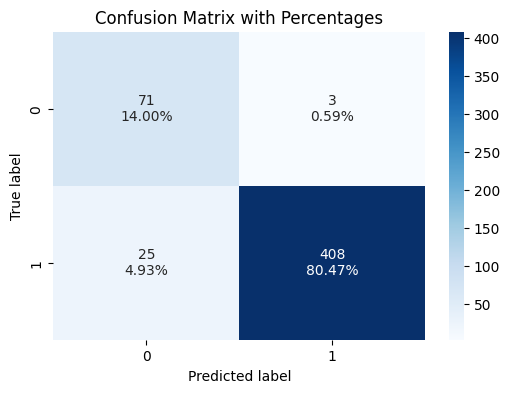

In [ ]:
confusion_matrix_sklearn(abc_tuned_un,X_val,y_val)

####For Bagging Classifier with original data

In [ ]:
# Initialize Bagging Classifier with the base estimator as Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

# Define the parameter grid for Bagging Classifier
param_grid = {
    'n_estimators': [30, 50, 70],           # Number of base estimators (trees)
    'max_samples': [0.8, 0.9, 1],           # Proportion of samples used in each base estimator
    'max_features': [0.7, 0.8, 0.9],        # Proportion of features used in each base estimator
    'estimator__max_depth': [3, 5, 7]       # Tree depth (optional, using 'estimator__' prefix)
}

# Define the scorer (can also use 'accuracy', 'precision', etc.)
scorer = metrics.make_scorer(metrics.f1_score)

# Initialize GridSearchCV with Bagging Classifier and the param grid
grid_obj = GridSearchCV(bagging_clf, param_grid, scoring=scorer, cv=5)

In [ ]:
grid_obj.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [30, 50, 70]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
bagging_clf_tuned= grid_obj.best_estimator_

In [ ]:
bagging_clf_tuned.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_features=0.7, max_samples=0.8, n_estimators=30,
                  random_state=1)

In [ ]:
#Calculating different metrics
bagging_clf_tuned_model_train_perf=model_performance_classification_sklearn(bagging_clf_tuned,X_train,y_train)
print("Training performance:\n",bagging_clf_tuned_model_train_perf)
bagging_clf_tuned_model_test_perf=model_performance_classification_sklearn(bagging_clf_tuned,X_test,y_test)
print("Testing performance:\n",bagging_clf_tuned_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.913   0.976      0.925 0.950
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.905   0.982      0.911 0.945


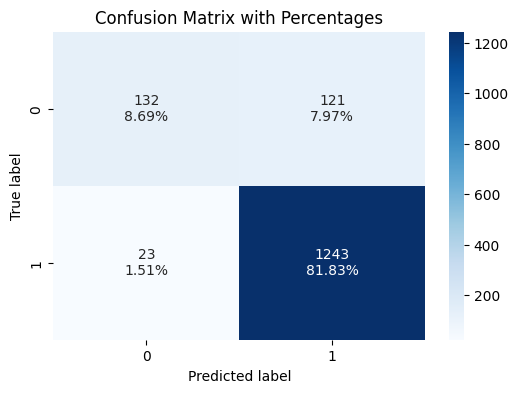

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned,X_test,y_test)

####Performance on original sample data validation set

In [ ]:
bagging_clf_tuned_model_val_perf=model_performance_classification_sklearn(bagging_clf_tuned,X_val,y_val)
print("Testing performance:\n",bagging_clf_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.929   0.988      0.932 0.960


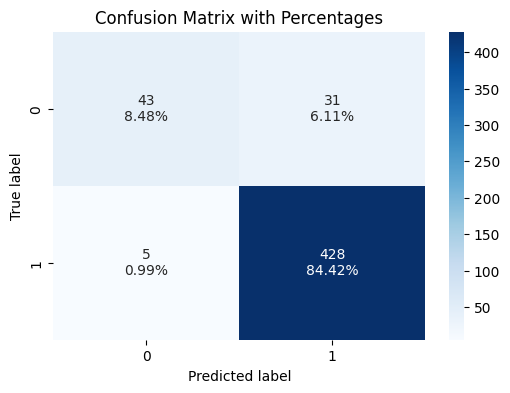

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned,X_val,y_val)

####For Bagging Classifier using oversampled data

In [ ]:
grid_obj.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [30, 50, 70]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
bagging_clf_tuned_over= grid_obj.best_estimator_

In [ ]:
bagging_clf_tuned_over.fit(X_train_over, y_train_over)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                  max_features=0.7, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:
# Calculating training performance
bagging_clf_tuned_over_model_train_perf = model_performance_classification_sklearn(bagging_clf_tuned_over, X_train_over, y_train_over)
print("Training performance:\n", bagging_clf_tuned_over_model_train_perf)
# Calculating testing performance
bagging_clf_tuned_over_model_test_perf = model_performance_classification_sklearn(bagging_clf_tuned_over, X_test, y_test)
print("Testing performance:\n", bagging_clf_tuned_over_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.973   0.963      0.981 0.972
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.949   0.953      0.985 0.969


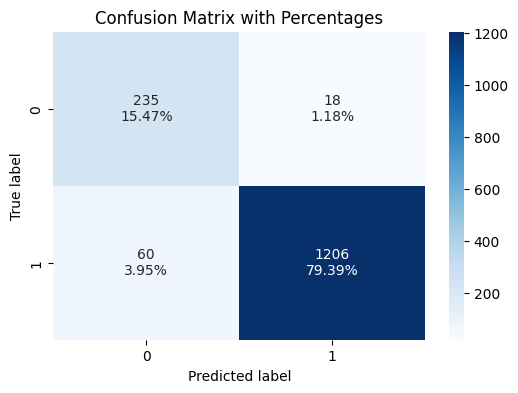

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned_over,X_test,y_test)

####Performance on over sample data validation set

In [ ]:
bagging_clf_tuned_over_model_val_perf=model_performance_classification_sklearn(bagging_clf_tuned_over,X_val,y_val)
print("Testing performance:\n",bagging_clf_tuned_over_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.947   0.945      0.993 0.968


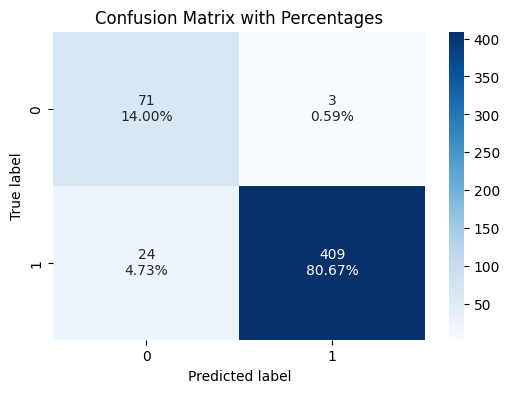

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned_over,X_val,y_val)

####For Bagging Classifier using undersampled data

In [ ]:
grid_obj.fit(X_train_un, y_train_un)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=1),
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'max_features': [0.7, 0.8, 0.9],
                         'max_samples': [0.8, 0.9, 1],
                         'n_estimators': [30, 50, 70]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
bagging_clf_tuned_un= grid_obj.best_estimator_

In [ ]:
bagging_clf_tuned_un.fit(X_train_un, y_train_un)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7),
                  max_features=0.7, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
#Calculating different metrics
bagging_clf_tuned_un_model_train_perf=model_performance_classification_sklearn(bagging_clf_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",bagging_clf_tuned_un_model_train_perf)
bagging_clf_tuned_un_model_test_perf=model_performance_classification_sklearn(bagging_clf_tuned_un,X_test,y_test)
print("Testing performance:\n",bagging_clf_tuned_un_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.980   0.972      0.988 0.980
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.930   0.926      0.990 0.957


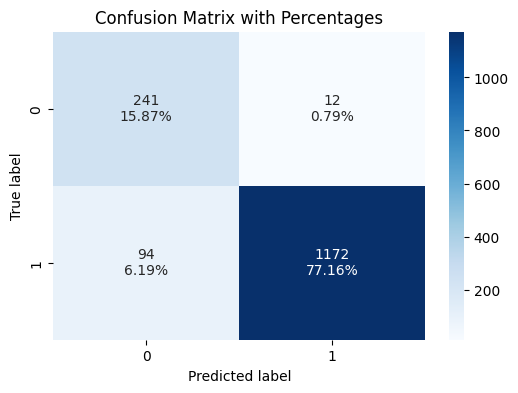

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned_un,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
bagging_clf_tuned_un_model_val_perf=model_performance_classification_sklearn(bagging_clf_tuned_un,X_val,y_val)
print("Testing performance:\n",bagging_clf_tuned_un_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.927   0.919      0.995 0.956


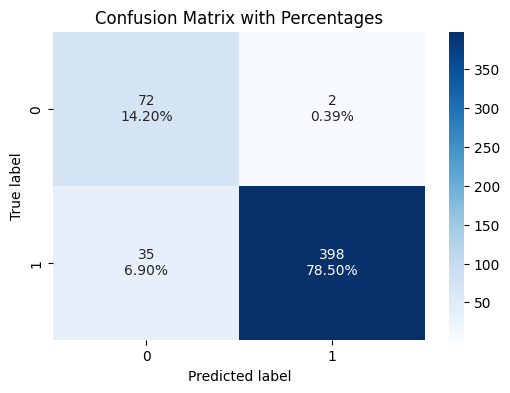

In [ ]:
confusion_matrix_sklearn(bagging_clf_tuned_un,X_val,y_val)

####For Random Forest with original data

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

# parameters = {
#                 'max_depth': list(np.arange(5,30,5)) + [None],
#                 'max_features': ['sqrt','log2',None],
#                 'min_samples_leaf': np.arange(1,15,5),
#                 'min_samples_split': np.arange(2, 20, 5),
#                 'n_estimators': np.arange(10,110,10)}

# Define the parameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 75, 110],           # Number of trees in the forest
    "min_samples_leaf": np.arange(1, 4),     # Minimum samples per leaf
    "max_features": [0.3, 0.4, 0.5, 'sqrt'], # Max features considered for splitting
    "max_samples": np.arange(0.4, 0.7, 0.1)  # Max samples if using bootstrap
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, param_grid, scoring=scorer, cv=5,n_jobs=-1)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
grid_obj = grid_obj.fit(X_train, y_train_encoded)

In [ ]:
rf_tuned = grid_obj.best_estimator_

In [ ]:
# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train_encoded)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.3,
                       max_samples=0.6, n_estimators=110, oob_score=True,
                       random_state=1)

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train, y_train_encoded)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.997   0.999      0.997 0.998
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.997   0.999      0.997 0.998


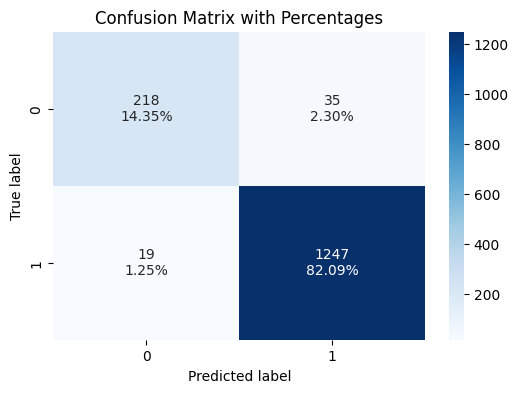

In [ ]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

####Performance on original data validation set

In [ ]:
rf_tuned_model_val_perf=model_performance_classification_sklearn(rf_tuned,X_val,y_val)
print("Testing performance:\n",rf_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.951   0.979      0.964 0.971


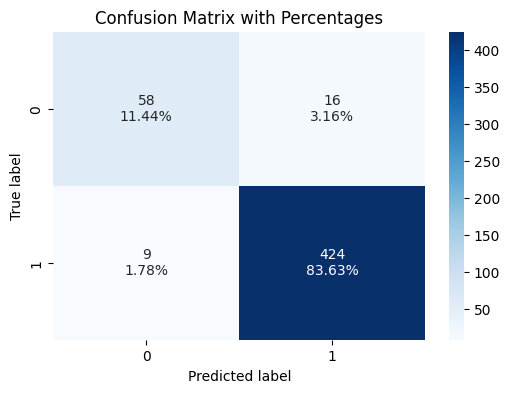

In [ ]:
confusion_matrix_sklearn(rf_tuned,X_val,y_val)

#### For Random Forest with over sample data

In [ ]:
grid_obj_over = grid_obj.fit(X_train_over, y_train_over)

In [ ]:
rf_tuned_over = grid_obj.best_estimator_
# Fit the best algorithm to the data.
rf_tuned_over.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.3,
                       max_samples=0.6, n_estimators=75, oob_score=True,
                       random_state=1)

In [ ]:
#Calculating different metrics
rf_tuned_over_model_train_perf=model_performance_classification_sklearn(rf_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",rf_tuned_over_model_train_perf)
rf_tuned_over_model_test_perf=model_performance_classification_sklearn(rf_tuned_over,X_test,y_test)
print("Testing performance:\n",rf_tuned_over_model_train_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.999   0.998      0.999 0.999
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.999   0.998      0.999 0.999


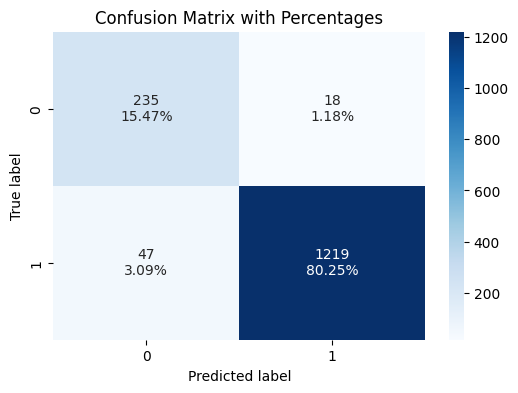

In [ ]:
confusion_matrix_sklearn(rf_tuned_over,X_test,y_test)

####Performance on oversample data validation set

In [ ]:
rf_tuned_over_model_val_perf=model_performance_classification_sklearn(rf_tuned_over,X_val,y_val)
print("Testing performance:\n",rf_tuned_over_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.957   0.961      0.988 0.974


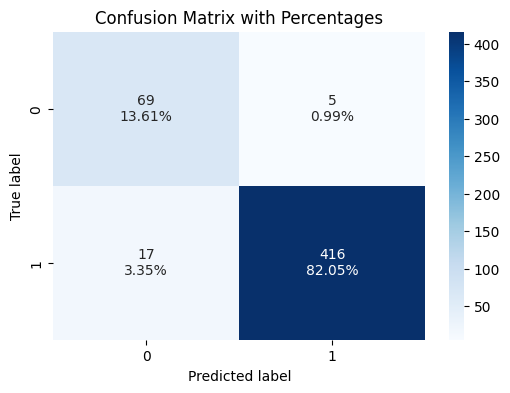

In [ ]:
confusion_matrix_sklearn(rf_tuned_over,X_val,y_val)

####For Random Forest with undersample data

In [ ]:
grid_obj = grid_obj.fit(X_train_un, y_train_un)

In [ ]:
rf_tuned_un = grid_obj.best_estimator_
# Fit the best algorithm to the data.
rf_tuned_un.fit(X_train_un, y_train_un)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_features=0.5,
                       max_samples=0.6, n_estimators=75, oob_score=True,
                       random_state=1)

In [ ]:
#Calculating different metrics
rf_tuned_un_model_train_perf=model_performance_classification_sklearn(rf_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",rf_tuned_un_model_train_perf)
rf_tuned_un_model_test_perf=model_performance_classification_sklearn(rf_tuned_un,X_test,y_test)
print("Testing performance:\n",rf_tuned_un_model_train_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.997   0.995      0.998 0.997
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.997   0.995      0.998 0.997


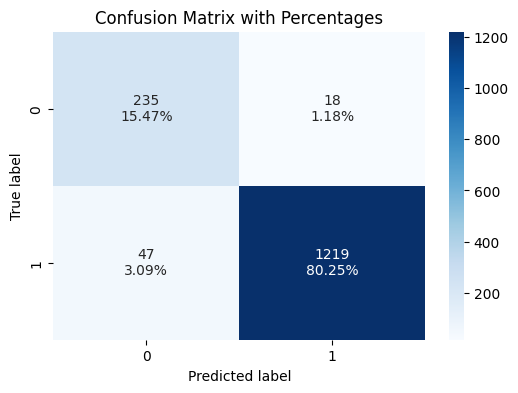

In [ ]:
confusion_matrix_sklearn(rf_tuned_over,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
rf_tuned_un_tuned_model_val_perf=model_performance_classification_sklearn(rf_tuned_un,X_val,y_val)
print("Testing performance:\n",rf_tuned_un_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.929   0.921      0.995 0.957


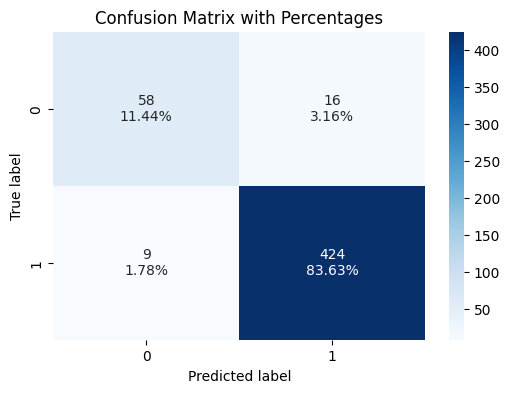

In [ ]:
confusion_matrix_sklearn(rf_tuned,X_val,y_val)

#### For XGBoost with original data

In [ ]:
# Assume y_train contains the target variable with string labels
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=1)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': np.arange(50, 110, 25),
    'scale_pos_weight': [1, 2, 5],
    'learning_rate': [0.01, 0.1, 0.05],
    'gamma': [1, 3],
    'subsample': [0.7, 0.9]
}

# Define the scorer
scorer = metrics.make_scorer(metrics.f1_score)

# Initialize GridSearchCV with the XGBoost model and the parameter grid
grid_obj = GridSearchCV(xgb_model, param_grid, scoring=scorer, cv=5, n_jobs=-1)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
# Fit the grid search
grid_obj.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 3], 'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': array([ 50,  75, 100]),
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.9]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
best_xgb_tuned= grid_obj.best_estimator_

In [ ]:
best_xgb_tuned.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
best_xgb_tuned_model_train_perf=model_performance_classification_sklearn(best_xgb_tuned,X_train,y_train_encoded)
print("Training performance:\n",best_xgb_tuned_model_train_perf)
best_xgb_tuned_model_test_perf=model_performance_classification_sklearn(best_xgb_tuned,X_test,y_test)
print("Testing performance:\n",best_xgb_tuned_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.994   0.997      0.995 0.996
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.966   0.983      0.976 0.980


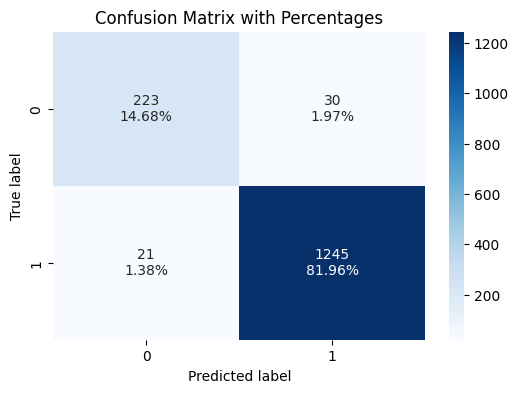

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned,X_test,y_test)

####Performance on original data validation set

In [ ]:
best_xgb_tuned_model_val_perf=model_performance_classification_sklearn(best_xgb_tuned,X_val,y_val)
print("Testing performance:\n",best_xgb_tuned_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.970   0.979      0.986 0.983


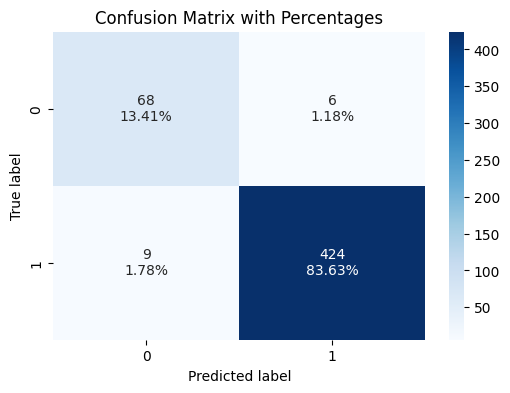

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned,X_val,y_val)

####For XGBoost using oversample Data

In [ ]:
# Fit the grid search
grid_obj.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 3], 'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': array([ 50,  75, 100]),
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.9]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
best_xgb_tuned_over= grid_obj.best_estimator_

In [ ]:
best_xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
best_xgb_tuned_over_model_train_perf=model_performance_classification_sklearn(best_xgb_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",best_xgb_tuned_over_model_train_perf)
best_xgb_tuned_over_model_test_perf=model_performance_classification_sklearn(best_xgb_tuned_over,X_test,y_test)
print("Testing performance:\n",best_xgb_tuned_over_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.995   0.994      0.996 0.995
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.961   0.974      0.979 0.977


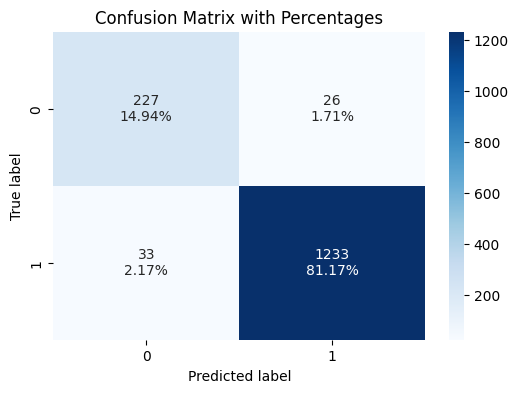

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned_over,X_test,y_test)

####Performance on oversample data validation set

In [ ]:
best_xgb_tuned_over_model_val_perf=model_performance_classification_sklearn(best_xgb_tuned_over,X_val,y_val)
print("Testing performance:\n",best_xgb_tuned_over_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.961   0.965      0.988 0.977


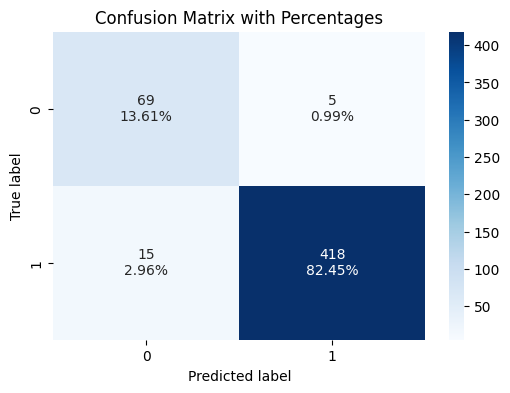

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned_over,X_val,y_val)

####For XGBoost using undersample Data

In [ ]:
# Fit the grid search
grid_obj.fit(X_train_un, y_train_un)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'gamma': [1, 3], 'learning_rate': [0.01, 0.1, 0.05],
                         'n_estimators': array([ 50,  75, 100]),
                         'scale_pos_weight': [1, 2, 5],
                         'subsample': [0.7, 0.9]},
             scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
best_xgb_tuned_un= grid_obj.best_estimator_

In [ ]:
best_xgb_tuned_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
best_xgb_tuned_un_model_train_perf=model_performance_classification_sklearn(best_xgb_tuned_un,X_train_un,y_train_un)
print("Training performance:\n",best_xgb_tuned_un_model_train_perf)
best_xgb_tuned_un_model_test_perf=model_performance_classification_sklearn(best_xgb_tuned_un,X_test,y_test)
print("Testing performance:\n",best_xgb_tuned_un_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.997   1.000      0.993 0.997
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.962   0.964      0.990 0.977


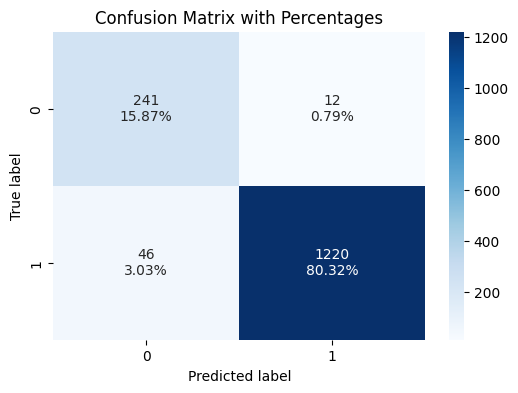

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned_un,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
best_xgb_tuned_un_model_val_perf=model_performance_classification_sklearn(best_xgb_tuned_un,X_val,y_val)
print("Testing performance:\n",best_xgb_tuned_un_model_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.945   0.942      0.993 0.967


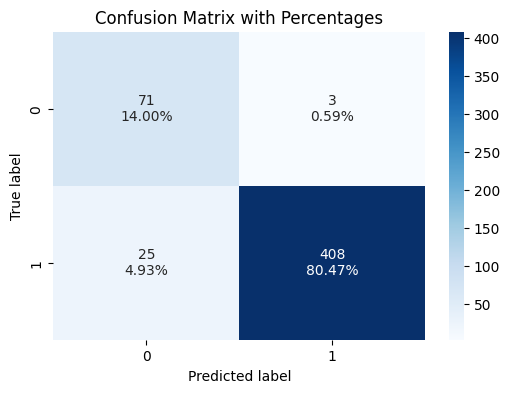

In [ ]:
confusion_matrix_sklearn(best_xgb_tuned_un,X_val,y_val)

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


In [ ]:
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_leaf_nodes': [10, 15],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.001],
                                        'min_samples_leaf': [1, 4, 7]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
randomized_cv_tuned= grid_obj.best_estimator_

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
randomized_cv_tuned.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
randomized_cv_tune_dmodel_train_perf=model_performance_classification_sklearn(randomized_cv_tuned,X_train,y_train)
print("Training performance:\n",randomized_cv_tune_dmodel_train_perf)
randomized_cv_tuned_model_test_perf=model_performance_classification_sklearn(randomized_cv_tuned,X_test,y_test)
print("Testing performance:\n",randomized_cv_tuned_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.993   0.999      0.993 0.996
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.966   0.989      0.971 0.980


In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=nan:


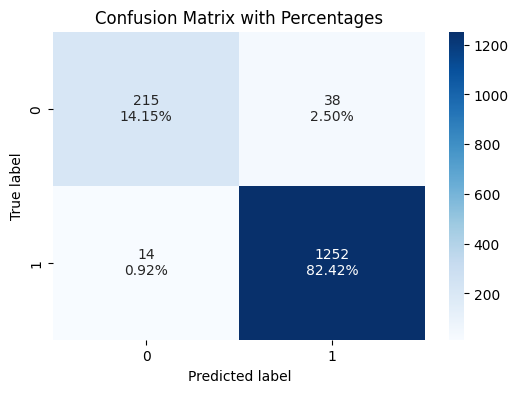

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned,X_test,y_test)

####Performance on original data validation set

In [ ]:
randomized_cv_tune_dmodel_val_perf=model_performance_classification_sklearn(randomized_cv_tuned,X_val,y_val)
print("Testing performance:\n",randomized_cv_tune_dmodel_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.970   0.984      0.982 0.983


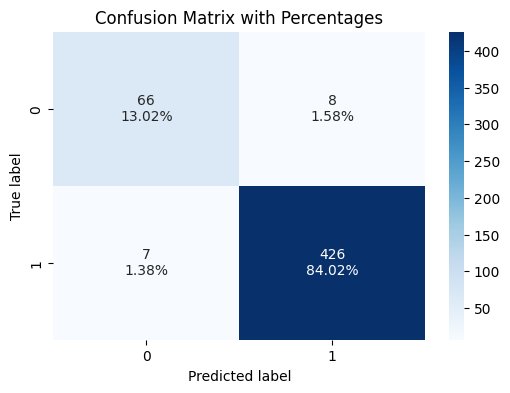

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned,X_val,y_val)

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)


In [ ]:
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_leaf_nodes': [10, 15],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.001],
                                        'min_samples_leaf': [1, 4, 7]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
randomized_cv_tuned_over= grid_obj.best_estimator_

In [ ]:
randomized_cv_tuned_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
randomized_cv_tuned_over_dmodel_train_perf=model_performance_classification_sklearn(randomized_cv_tuned_over,X_train_over,y_train_over)
print("Training performance:\n",randomized_cv_tuned_over_dmodel_train_perf)
randomized_cv_tuned_over_model_test_perf=model_performance_classification_sklearn(randomized_cv_tuned_over,X_test,y_test)
print("Testing performance:\n",randomized_cv_tuned_over_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.995   0.997      0.993 0.995
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.967   0.987      0.974 0.980


In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.912324058387329:


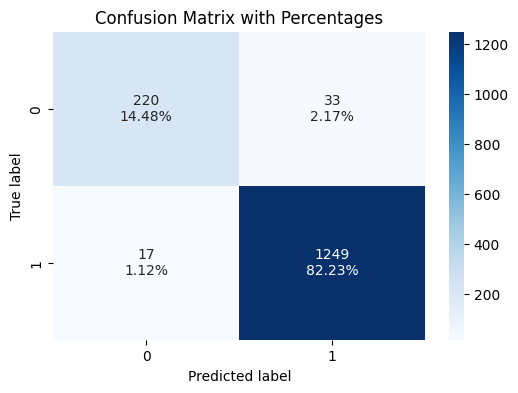

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned_over,X_test,y_test)

####Performance on oversample data validation set

In [ ]:
randomized_cv_tuned_over_dmodel_val_perf=model_performance_classification_sklearn(randomized_cv_tuned_over,X_val,y_val)
print("Testing performance:\n",randomized_cv_tuned_over_dmodel_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.959   0.968      0.984 0.976


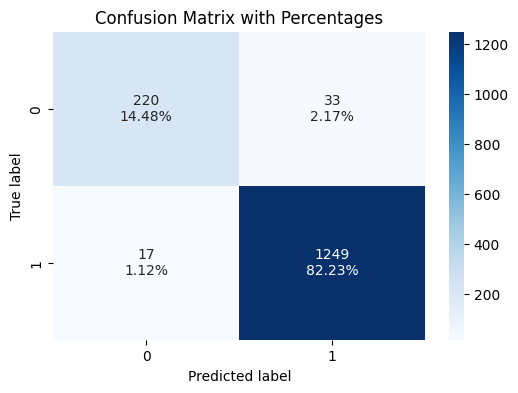

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned_over,X_test,y_test)

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)


In [ ]:
#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([2, 3, 4, 5]),
                                        'max_leaf_nodes': [10, 15],
                                        'min_impurity_decrease': [0.0001,
                                                                  0.001],
                                        'min_samples_leaf': [1, 4, 7]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
# Get the best model
randomized_cv_tuned_un= grid_obj.best_estimator_

In [ ]:
randomized_cv_tuned_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
#Calculating different metrics
randomized_cv_tuned_un_dmodel_train_perf=model_performance_classification_sklearn(randomized_cv_tuned_un,X_train,y_train)
print("Training performance:\n",randomized_cv_tuned_over_dmodel_train_perf)
randomized_cv_tuned_un_model_test_perf=model_performance_classification_sklearn(randomized_cv_tuned_over,X_test,y_test)
print("Testing performance:\n",randomized_cv_tuned_un_model_test_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.995   0.997      0.993 0.995
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.962   0.964      0.990 0.977


In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.8784363399736398:


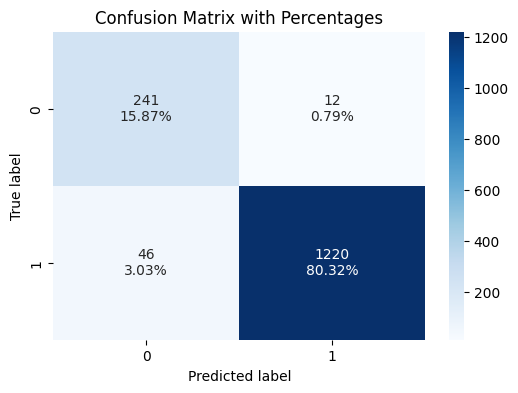

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned_un,X_test,y_test)

####Performance on undersample data validation set

In [ ]:
randomized_cv_tuned_un_dmodel_val_perf=model_performance_classification_sklearn(randomized_cv_tuned_un,X_val,y_val)
print("Testing performance:\n",randomized_cv_tuned_un_dmodel_val_perf)

Testing performance:
    Accuracy  Recall  Precision    F1
0     0.945   0.942      0.993 0.967


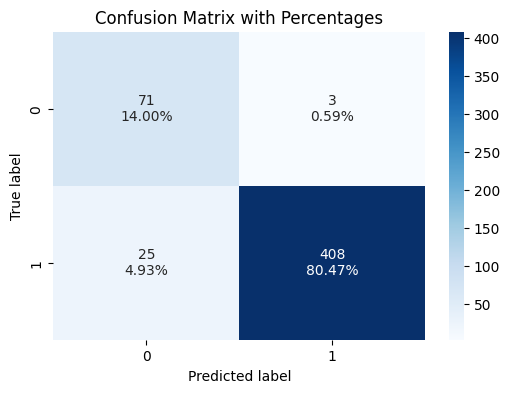

In [ ]:
confusion_matrix_sklearn(randomized_cv_tuned_un,X_val,y_val)

# Model Comparison and Final Model Selection & Test set final performance

In [ ]:
models_train_original_comp_df = pd.concat(
    [gbc_tuned_model_train_perf.T,abc_tuned_original_model_train_perf.T,bagging_clf_tuned_model_train_perf.T,rf_tuned_model_train_perf.T,best_xgb_tuned_model_train_perf.T,randomized_cv_tune_dmodel_train_perf.T],
    axis=1,
)

In [ ]:
models_train_original_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print("Training performance comparison for originla train data")
models_train_original_comp_df

Training performance comparison for originla train data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.847,0.894,0.913,0.997,0.994,0.993
Recall,1.000,0.964,0.976,0.999,0.997,0.999
Precision,0.846,0.915,0.925,0.997,0.995,0.993
F1,0.917,0.938,0.950,0.998,0.996,0.996


In [ ]:
models_test_original_comp_df = pd.concat(
    [gbc_tuned_model_test_perf.T,abc_tuned_original_model_test_perf.T,bagging_clf_tuned_model_test_perf.T,rf_tuned_model_test_perf.T,best_xgb_tuned_model_test_perf.T,randomized_cv_tuned_model_test_perf.T],
    axis=1,
)
models_test_original_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for originla Test data")
models_test_original_comp_df

 performance comparison for originla Test data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.840,0.883,0.905,0.964,0.966,0.966
Recall,1.000,0.969,0.982,0.985,0.983,0.989
Precision,0.839,0.899,0.911,0.973,0.976,0.971
F1,0.912,0.933,0.945,0.979,0.980,0.980


In [ ]:
models_val_original_comp_df = pd.concat(
    [gbc_tuned_model_val_perf.T,abc_tuned_original_model_val_perf.T,bagging_clf_tuned_model_val_perf.T,rf_tuned_model_val_perf.T,best_xgb_tuned_model_val_perf.T,randomized_cv_tune_dmodel_val_perf.T],
    axis=1,
)
models_val_original_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for original Validation data")
models_val_original_comp_df

 performance comparison for original Validation data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.858,0.915,0.929,0.951,0.970,0.970
Recall,1.000,0.979,0.988,0.979,0.979,0.984
Precision,0.857,0.926,0.932,0.964,0.986,0.982
F1,0.923,0.952,0.960,0.971,0.983,0.983


In [ ]:
#Results for Oversampled data


In [ ]:
models_over_train_comp_df = pd.concat(
    [gbc_tuned_over_model_train_perf.T,abc_tuned_over_model_train_perf.T,bagging_clf_tuned_over_model_train_perf.T,rf_tuned_over_model_train_perf.T,best_xgb_tuned_over_model_train_perf.T,randomized_cv_tuned_over_dmodel_train_perf.T],
    axis=1,
)
models_over_train_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for over train data")
models_over_train_comp_df

 performance comparison for over train data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.976,0.982,0.973,0.999,0.995,0.995
Recall,0.974,0.989,0.963,0.998,0.994,0.997
Precision,0.978,0.989,0.981,0.999,0.996,0.993
F1,0.976,0.989,0.972,0.999,0.995,0.995


In [ ]:
models_over_test_comp_df = pd.concat(
    [gbc_tuned_over_model_test_perf.T,abc_tuned_over_model_test_perf.T,bagging_clf_tuned_over_model_test_perf.T,rf_tuned_over_model_test_perf.T,best_xgb_tuned_over_model_test_perf.T,randomized_cv_tuned_over_model_test_perf.T],
    axis=1,
)
models_over_test_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for over test data")
models_over_test_comp_df

 performance comparison for over test data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.959,0.962,0.949,0.957,0.961,0.967
Recall,0.968,0.978,0.953,0.963,0.974,0.987
Precision,0.982,0.977,0.985,0.985,0.979,0.974
F1,0.975,0.977,0.969,0.974,0.977,0.980


In [ ]:
models_over_val_comp_df = pd.concat(
    [gbc_tuned_over_model_val_perf.T,abc_tuned_over_model_val_perf.T,bagging_clf_tuned_over_model_val_perf.T,rf_tuned_over_model_val_perf.T,best_xgb_tuned_over_model_val_perf.T,randomized_cv_tuned_over_dmodel_val_perf.T],
    axis=1,
)
models_over_val_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for over validation data")
models_over_val_comp_df

 performance comparison for over validation data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.953,0.959,0.947,0.957,0.961,0.959
Recall,0.961,0.968,0.945,0.961,0.965,0.968
Precision,0.983,0.984,0.993,0.988,0.988,0.984
F1,0.972,0.976,0.968,0.974,0.977,0.976


In [ ]:
models_un_train_comp_df = pd.concat(
    [gbc_un_tuned_model_train_perf.T,abc_un_tuned_model_train_perf.T,bagging_clf_tuned_un_model_train_perf.T,rf_tuned_un_model_train_perf.T,best_xgb_tuned_un_model_train_perf.T,randomized_cv_tuned_un_dmodel_train_perf.T],
    axis=1,
)
models_un_train_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for Under train data")
models_un_train_comp_df

 performance comparison for Under train data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.976,0.976,0.980,0.997,0.997,0.971
Recall,0.973,0.973,0.972,0.995,1.000,0.967
Precision,0.979,0.979,0.988,0.998,0.993,0.999
F1,0.976,0.976,0.980,0.997,0.997,0.983


In [ ]:
models_un_test_comp_df = pd.concat(
    [gbc_under_tuned_model_test_perf.T,abc_un_tuned_model_test_perf.T,bagging_clf_tuned_un_model_test_perf.T,rf_tuned_un_model_test_perf.T,best_xgb_tuned_un_model_test_perf.T,randomized_cv_tuned_un_model_test_perf.T],
    axis=1,
)
models_un_test_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for Under test data")
models_un_test_comp_df

 performance comparison for Under test data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.950,0.950,0.930,0.937,0.962,0.962
Recall,0.949,0.949,0.926,0.932,0.964,0.964
Precision,0.991,0.991,0.990,0.992,0.990,0.990
F1,0.969,0.969,0.957,0.961,0.977,0.977


In [ ]:
models_un_val_comp_df = pd.concat(
    [gbc_tuned_model_un_val_perf.T,abc_un_tuned_model_val_perf.T,bagging_clf_tuned_un_model_val_perf.T,rf_tuned_un_tuned_model_val_perf.T,best_xgb_tuned_un_model_val_perf.T,randomized_cv_tuned_un_dmodel_val_perf.T],
    axis=1,
)
models_un_val_comp_df.columns = [
    'Gradient Boosting',
    'AdaBoost',
    'Bagging Classifier',
    'Random Forest',
    'XGBoost',
    'Decision Tree'
]
print(" performance comparison for Under validation data")
models_un_val_comp_df

 performance comparison for Under validation data


,Gradient Boosting,AdaBoost,Bagging Classifier,Random Forest,XGBoost,Decision Tree
Accuracy,0.945,0.945,0.927,0.929,0.945,0.945
Recall,0.942,0.942,0.919,0.921,0.942,0.942
Precision,0.993,0.993,0.995,0.995,0.993,0.993
F1,0.967,0.967,0.956,0.957,0.967,0.967


#Summary of Model Performance:

#**1. Original Data:**

##**Best Performing Models:**

##**Training:**

*   Random Forest (0.971 F1), XGBoost (0.983 F1), Decision Tree (0.983 F1) — All these models performed very well, with high accuracy, recall, and precision.

##**Testing:**

*   Random Forest (0.979 F1), XGBoost (0.980 F1), Decision Tree (0.980 F1) — Similar performance on test data.

##**Validation:**

 *   XGBoost (0.983 F1), Random Forest (0.971 F1), Bagging Classifier (0.960 F1) — XGBoost stood out with high precision and recall.

#**2. Over-Sampled Data:**

##**Best Performing Models:**

##**Training:**

*    Gradient Boosting (0.980 F1), XGBoost (0.977 F1), Decision Tree (0.976 F1) — These models performed well on training data.

##**Testing:**

*    Gradient Boosting (0.975 F1), XGBoost (0.977 F1), Decision Tree (0.977 F1) — Consistent strong performance on over-sampled test data.

##**Validation:**

*    XGBoost (0.977 F1), Random Forest (0.974 F1), Decision Tree (0.967 F1) — XGBoost continues to lead in performance.

#**3. Under-Sampled Data:**

##**Best Performing Models:**

##**Training:**

*   Random Forest (0.997 F1), Gradient Boosting (0.976 F1), AdaBoost (0.976 F1) — Random Forest achieves near-perfect results.

##**Testing:**

*   XGBoost (0.977 F1), Decision Tree (0.977 F1), Gradient Boosting (0.969 F1) — XGBoost and Decision Tree excelled on under-sampled test data.

##**Validation:**

*    XGBoost (0.967 F1), Gradient Boosting (0.967 F1), Decision Tree (0.967 F1) — Strong and consistent performance from these models.

##**Observations:**

*   XGBoost consistently performs the best across all datasets (original, over, and under), especially in terms of F1 score, recall, and precision. This makes it a top choice, especially if you're focusing on imbalanced classification problems, as it maintains a strong balance between recall and precision.

*   Random Forest also performs exceptionally well, particularly on under-sampled and original datasets, making it another strong candidate.

*   AdaBoost tends to struggle more compared to the other models, especially in the over-sampled datasets, where it exhibits lower accuracy and F1 scores.

*   Decision Trees and Bagging Classifier perform comparably well in many cases but may be slightly less consistent across all datasets compared to XGBoost and Random Forest.

##**Recommendations:**

*   Based on your goal (likely maximizing F1 score due to class imbalance), XGBoost would be the most reliable model overall.

*   For under-sampled data, Random Forest also performs at an exceptional level and might be worth considering, especially if interpretability and training time are concerns.

*   If time or computational resources are limited, Decision Tree models provide a simpler yet effective alternative, with performance close to XGBoost in many cases.

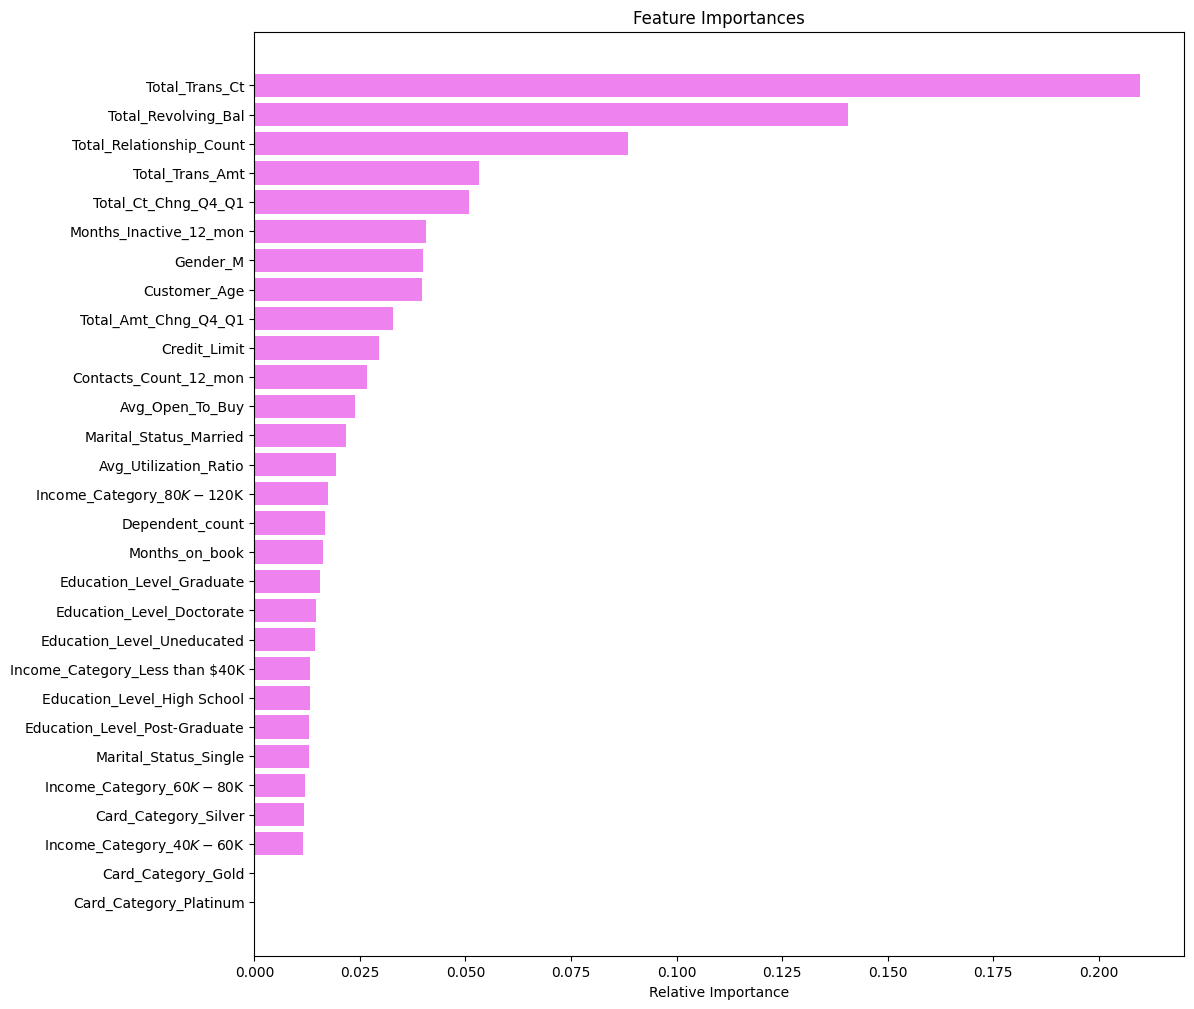

In [ ]:
feature_names = X_train.columns
importances = best_xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

###Observations

**Total Transaction Count is the Most Influential Factor:**

*   The most important feature in determining whether a customer will churn is the Total Transaction Count. This suggests that customers who make more frequent transactions are less likely to churn, likely because higher transaction activity indicates engagement with the bank’s services.

**Total Revolving Balance and Total Transaction Amount are Key Factors:**

*   The next two most important features are Total Revolving Balance and Total Transaction Amount. This indicates that customers with high revolving balances (balances carried over month to month) and those who spend more are less likely to churn. It may imply that high spending and balance-keeping customers are more dependent on the bank’s credit facilities.

**Variables Related to the Card Category (Gold, Platinum) Also Matter:**

*   Features like Card Category_Gold and Card Category_Platinum are among the top influential variables. Customers with premium credit cards are less likely to churn, which suggests that offering exclusive cards or rewards programs tied to those cards helps with customer retention.

**Tenure-Related Features Like 'Months on Book' are Important:**

*   Months on Book, which reflects the length of time the customer has been with the bank, is another significant feature. This implies that customers with longer relationships with the bank are less likely to churn, indicating the importance of maintaining long-term customer relationships.

**Transactional Change over Time:**

*   Features such as Total Transaction Amount Change Q4 over Q1 and Total Transaction Count Change Q4 over Q1 also have notable importance. This implies that sudden drops in transaction activity over time (i.e., fewer transactions in recent months) may be a signal that a customer is disengaging and more likely to churn.

**Monthly Inactive Days and Contact Count:**

*   Months Inactive_12_mon and Contacts Count_12_mon highlight that customer inactivity and fewer contacts with the bank can predict churn. Customers who haven’t interacted with the bank for several months are at higher risk of leaving.

**Credit-Related Factors (Credit Limit, Avg Open to Buy):**

*   Features like Credit Limit and Avg Open to Buy (the available credit balance) also impact the prediction. Customers with larger available credit or higher limits may feel more secure and less likely to leave, while those nearing their credit limit might face financial stress, which could lead them to switch banks.

**Demographics Have Lower Influence:**

*   Features like Income Category, Age, Marital Status, and Education Level show lower relative importance compared to transaction and credit management behaviors. While demographics play a role, they are not as strong predictors of churn in comparison to financial and transactional behaviors.

**Less Significant Features:**

*   Factors like Dependent Count and Months Inactive are present, but their influence is relatively minimal. This indicates that while these variables do contribute, they are not the most critical drivers for predicting churn.

**Summary of Key Insights:**

*   Customer transaction behavior (total transaction count and amount) plays a central role in determining churn.

*   Credit management factors such as revolving balance and credit limits also strongly influence churn, indicating financial stress or disengagement.

*   Customers with premium card categories (Gold, Platinum) and those who have been with the bank for a long time are less likely to churn, suggesting that loyalty programs and long-term relationships should be prioritized.

*   Inactivity and sudden changes in transactional patterns are early signals of potential churn, and these customers should be engaged with personalized offers or attention.

*   Demographics play a secondary role compared to financial and behavioral factors.







# Business Insights and Conclusions

***

##Transaction Behavior is Key:

*   Total Transaction Count and Total Revolving Balance are the most influential features. This suggests that customer transaction behavior, including the volume of transactions and how much balance they maintain, plays a major role in determining their engagement with a financial product.

**Business Conclusion:**

*   High transaction activity could indicate loyalty, while low activity or balance might signal disengagement. Focus on incentivizing customers with high balances but low transaction counts, perhaps through targeted rewards or personalized promotions.

**Relationship Depth with the Bank:**

*   Total Relationship Count and Total Transaction Amount indicate how involved the customer is with the bank's products (e.g., loans, savings accounts, credit cards). Customers with deeper relationships are likely more stable.

**Business Conclusion:**

*   Strengthen customer relationships by cross-selling additional financial products (like insurance or investment services) to boost retention and prevent churn.

**Customer Tenure and Inactivity Matter:**

*   Months Inactive and Months on Book reflect customer loyalty over time. Customers with extended periods of inactivity are more likely to churn, while those with longer tenure are more likely to stay.

**Business Conclusion:**

*   Engage inactive customers by offering incentives or by addressing potential reasons for inactivity, such as poor service or unappealing products.

**Demographics and Age Influence Engagement:**

*   Gender and Age are relatively important features, indicating that demographic factors play a role in customer behavior.

**Business Conclusion:**

*   Tailor marketing strategies based on demographic insights. For example, younger customers might prefer digital banking solutions, while older customers may need more personalized services.

**Credit Management Indicators:**

*   Credit Limit and Average Open to Buy show the customer's credit management habits. Customers with high credit limits and responsible spending (not maxing out credit) are likely more stable.

Business Conclusion:

*   Promote financial wellness programs or offer tailored credit solutions to customers with low credit utilization, encouraging them to explore more credit options with the bank.

##Income and Marital Status:

*   Income Category and Marital Status are also significant, highlighting the role of financial stability and personal situations in determining whether a customer remains loyal.

**Business Conclusion:**

*   Develop targeted products or services based on income levels and family circumstances (e.g., joint accounts for married customers, investment advice for high-income earners).

##Overall Business Strategy:

**Customer Segmentation:**

*   Using the insights above, segment your customers based on transaction behavior, relationship depth, and demographics. This will allow for more effective targeting of offers and services.

**Preventing Churn:**

*   Focus retention efforts on customers showing early signs of inactivity, high balances, or declining transaction counts. Personalizing offers based on these signals can prevent churn.

**Growth through Engagement:**

*   Encourage deeper relationships by cross-selling products to customers with limited involvement with the bank, boosting both engagement and profitability.

*   These insights will help refine marketing, customer service, and retention strategies to boost overall business performance.